In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [2]:
# Load dataset
uts = pd.read_csv('water_pollution_disease.csv')

In [3]:
print("===== DATA COLLECTION (INFORMASI AWAL DATASET) =====")

===== DATA COLLECTION (INFORMASI AWAL DATASET) =====


In [4]:
print("=== INFORMASI DATASET ===")
print(f"Jumlah baris dan kolom: {uts.shape}")
print("\nLima data teratas:")
print(uts.head())

# Menampilkan jumlah baris dan kolom
print("Jumlah baris dan kolom:", uts.shape)

=== INFORMASI DATASET ===
Jumlah baris dan kolom: (3000, 24)

Lima data teratas:
     Country   Region  Year Water Source Type  Contaminant Level (ppm)  \
0     Mexico    North  2015              Lake                     6.06   
1     Brazil     West  2017              Well                     5.24   
2  Indonesia  Central  2022              Pond                     0.24   
3    Nigeria     East  2016              Well                     7.91   
4     Mexico    South  2005              Well                     0.12   

   pH Level  Turbidity (NTU)  Dissolved Oxygen (mg/L)  Nitrate Level (mg/L)  \
0      7.12             3.93                     4.28                  8.28   
1      7.84             4.79                     3.86                 15.74   
2      6.43             0.79                     3.42                 36.67   
3      6.71             1.96                     3.12                 36.92   
4      8.16             4.22                     9.15                 49.35   


In [5]:
print("=== INFORMASI DETAIL TIAP KOLOM ===")
print(uts.info())

=== INFORMASI DETAIL TIAP KOLOM ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Country                                        3000 non-null   object 
 1   Region                                         3000 non-null   object 
 2   Year                                           3000 non-null   int64  
 3   Water Source Type                              3000 non-null   object 
 4   Contaminant Level (ppm)                        3000 non-null   float64
 5   pH Level                                       3000 non-null   float64
 6   Turbidity (NTU)                                3000 non-null   float64
 7   Dissolved Oxygen (mg/L)                        3000 non-null   float64
 8   Nitrate Level (mg/L)                           3000 non-null   float64
 9   Lead Concentrati

In [6]:
print("=== INFORMASI STATISTIK DESKRIPTIF ===")
print(uts.describe())

=== INFORMASI STATISTIK DESKRIPTIF ===
              Year  Contaminant Level (ppm)     pH Level  Turbidity (NTU)  \
count  3000.000000              3000.000000  3000.000000      3000.000000   
mean   2012.012667                 4.954390     7.255847         2.480023   
std       7.229287                 2.860072     0.720464         1.419984   
min    2000.000000                 0.000000     6.000000         0.000000   
25%    2006.000000                 2.560000     6.630000         1.257500   
50%    2012.000000                 4.950000     7.280000         2.460000   
75%    2018.000000                 7.400000     7.870000         3.660000   
max    2024.000000                10.000000     8.500000         4.990000   

       Dissolved Oxygen (mg/L)  Nitrate Level (mg/L)  \
count              3000.000000            3000.00000   
mean                  6.492850              25.08025   
std                   2.027966              14.50517   
min                   3.000000             

In [7]:
print("=== INDENTIFIKASI TIPE DATA ===")
numeric_cols = uts.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = uts.select_dtypes(include=['object']).columns

print("Kolom numerik:", list(numeric_cols))
print("Kolom kategorikal:", list(categorical_cols))

=== INDENTIFIKASI TIPE DATA ===
Kolom numerik: ['Year', 'Contaminant Level (ppm)', 'pH Level', 'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'Nitrate Level (mg/L)', 'Lead Concentration (µg/L)', 'Bacteria Count (CFU/mL)', 'Access to Clean Water (% of Population)', 'Diarrheal Cases per 100,000 people', 'Cholera Cases per 100,000 people', 'Typhoid Cases per 100,000 people', 'Infant Mortality Rate (per 1,000 live births)', 'GDP per Capita (USD)', 'Healthcare Access Index (0-100)', 'Urbanization Rate (%)', 'Sanitation Coverage (% of Population)', 'Rainfall (mm per year)', 'Temperature (°C)', 'Population Density (people per km²)']
Kolom kategorikal: ['Country', 'Region', 'Water Source Type', 'Water Treatment Method']


In [8]:
print("=== CEK DAN CLEANING DUPLIKASI DATA ===")
print(uts.duplicated().sum())
uts = uts.drop_duplicates()

=== CEK DAN CLEANING DUPLIKASI DATA ===
0


=== VISUALISASI DATA MENTAH NUMERIK ===


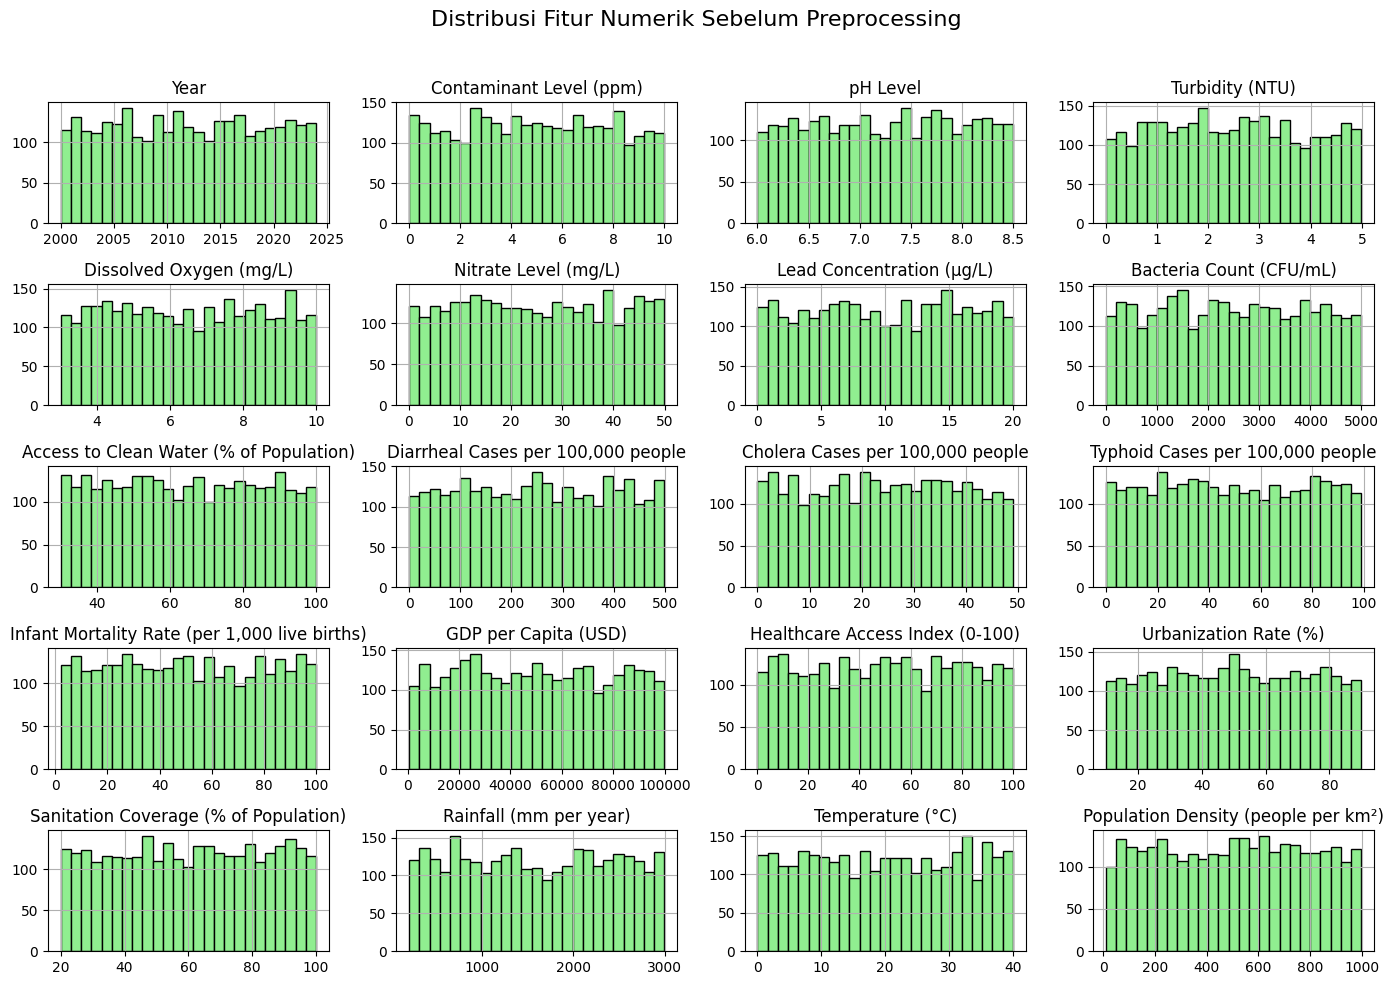

In [9]:
print("=== VISUALISASI DATA MENTAH NUMERIK ===")
uts.hist(figsize=(14, 10), bins=25, color='lightgreen', edgecolor='black')
plt.suptitle("Distribusi Fitur Numerik Sebelum Preprocessing", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

=== VISUALISASI DATA MENTAH KATEGORIKAL ===


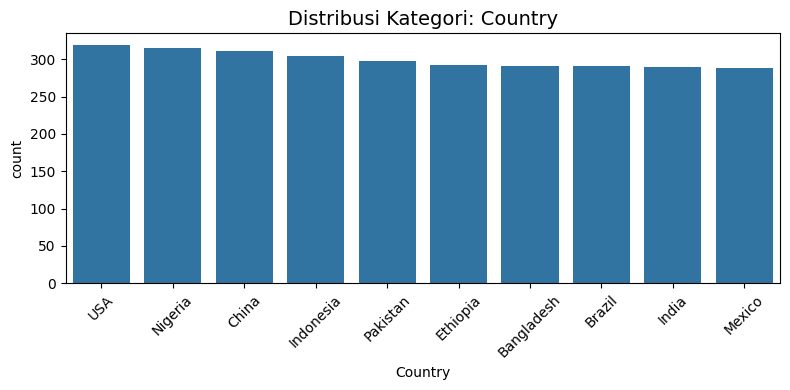

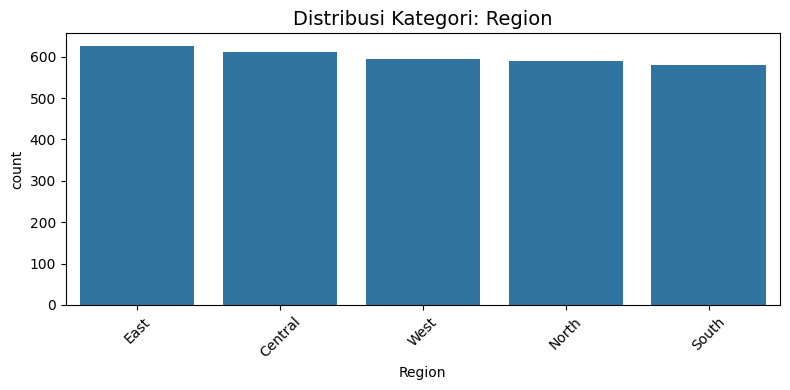

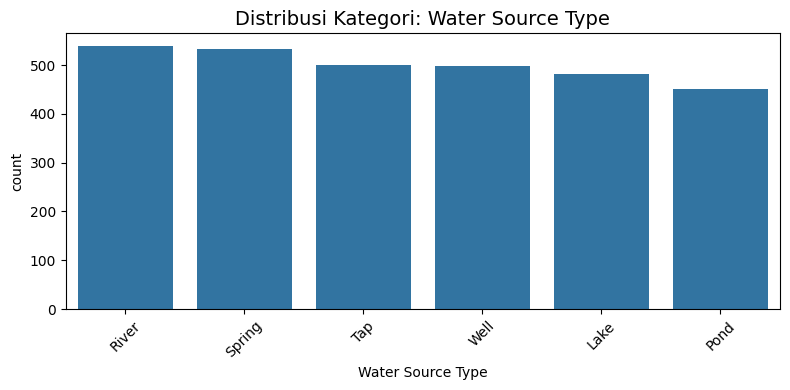

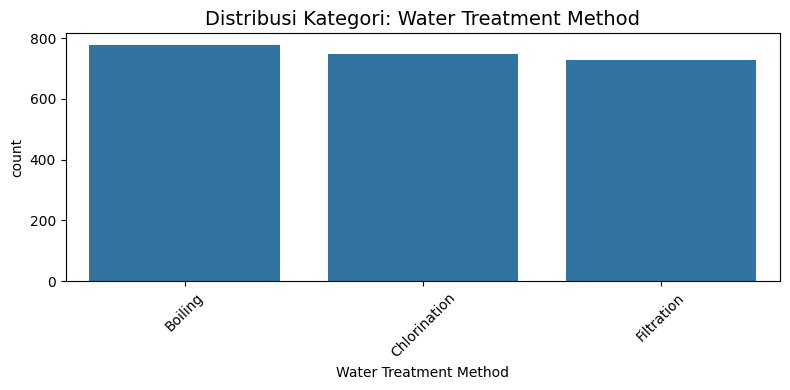

In [10]:
print("=== VISUALISASI DATA MENTAH KATEGORIKAL ===")
categorical_cols = uts.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=uts, x=col, order=uts[col].value_counts().index)
    plt.title(f"Distribusi Kategori: {col}", fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

=== VISUALISASI DATA MENTAH ANTAR NUMERIK ===


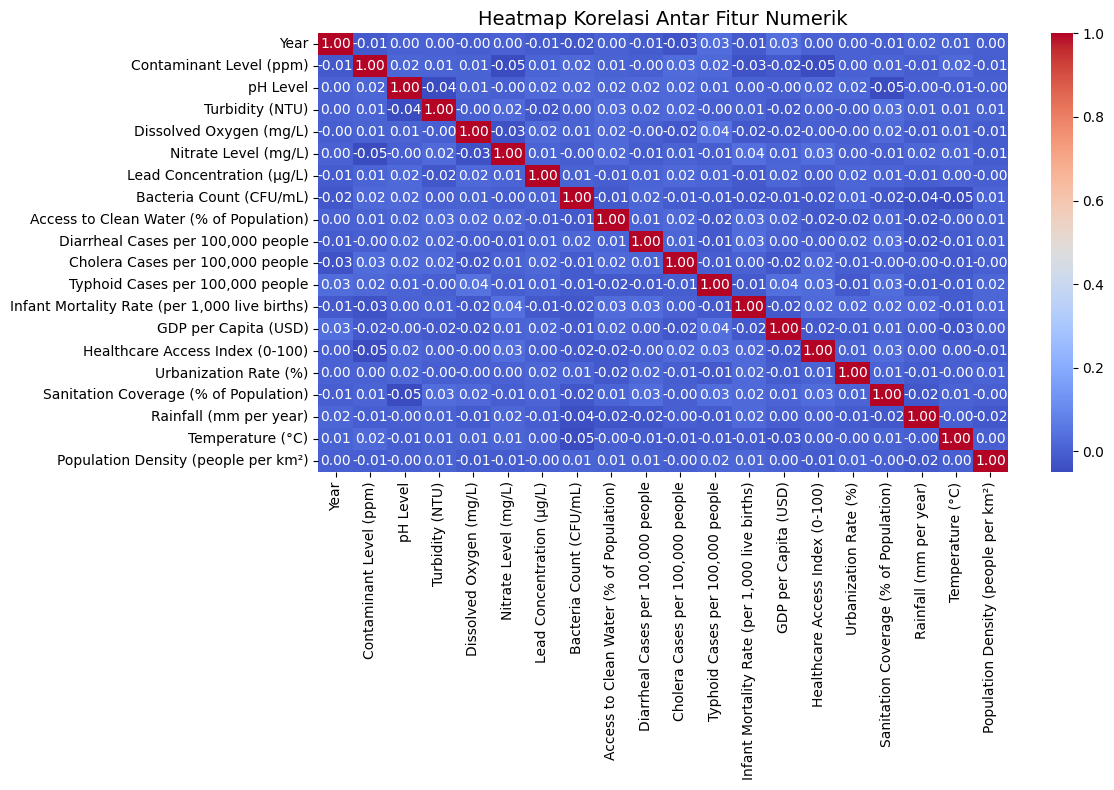

In [11]:
print("=== VISUALISASI DATA MENTAH ANTAR NUMERIK ===")
plt.figure(figsize=(12, 8))
sns.heatmap(uts.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Antar Fitur Numerik", fontsize=14)
plt.tight_layout()
plt.show()

In [12]:
print("===== DATA PROCESSING AND TACHNIQUES (ADVANCE PREPROCESSING) =====")

===== DATA PROCESSING AND TACHNIQUES (ADVANCE PREPROCESSING) =====


In [13]:
print("=== HANDLING MISSING VALUES (MEAN & MODE IMPUTATION) ===")
# Pisahkan kolom numerik dan kategorikal
num_cols = uts.select_dtypes(include=['float64', 'int64']).columns
cat_cols = uts.select_dtypes(include=['object']).columns

# Sebelum imputasi 
print("\nKolom numerik sebelum imputasi (jumlah missing values):")
print(uts[num_cols].isnull().sum())

print("\nKolom kategorikal sebelum imputasi (jumlah missing values):")
print(uts[cat_cols].isnull().sum())

=== HANDLING MISSING VALUES (MEAN & MODE IMPUTATION) ===

Kolom numerik sebelum imputasi (jumlah missing values):
Year                                             0
Contaminant Level (ppm)                          0
pH Level                                         0
Turbidity (NTU)                                  0
Dissolved Oxygen (mg/L)                          0
Nitrate Level (mg/L)                             0
Lead Concentration (µg/L)                        0
Bacteria Count (CFU/mL)                          0
Access to Clean Water (% of Population)          0
Diarrheal Cases per 100,000 people               0
Cholera Cases per 100,000 people                 0
Typhoid Cases per 100,000 people                 0
Infant Mortality Rate (per 1,000 live births)    0
GDP per Capita (USD)                             0
Healthcare Access Index (0-100)                  0
Urbanization Rate (%)                            0
Sanitation Coverage (% of Population)            0
Rainfall (mm per ye

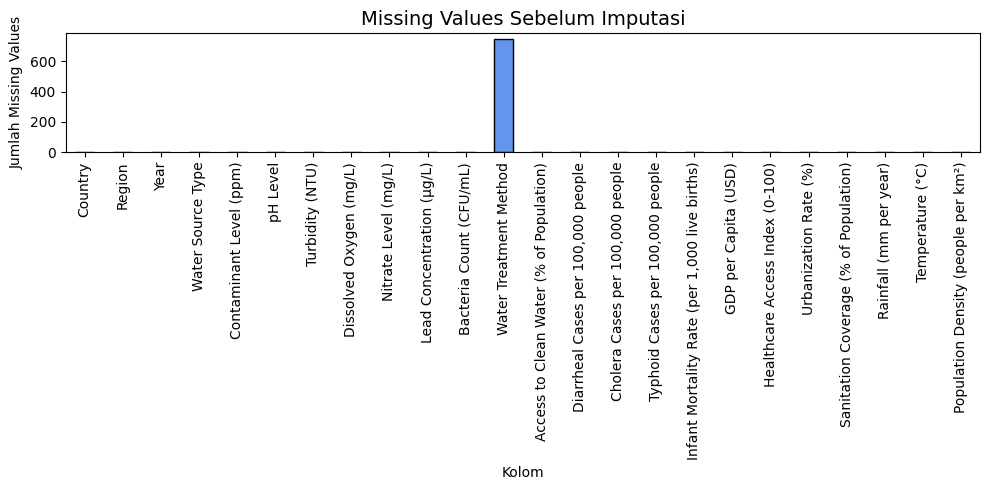

In [14]:
plt.figure(figsize=(10, 5))
uts.isnull().sum().plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title("Missing Values Sebelum Imputasi", fontsize=14)
plt.xlabel("Kolom")
plt.ylabel("Jumlah Missing Values")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Penanganan missing values
Kolom 'Water Treatment Method' → 747 nilai diisi dengan mode ('Boiling')

Jumlah missing values setelah imputasi:
Country                                          0
Region                                           0
Year                                             0
Water Source Type                                0
Contaminant Level (ppm)                          0
pH Level                                         0
Turbidity (NTU)                                  0
Dissolved Oxygen (mg/L)                          0
Nitrate Level (mg/L)                             0
Lead Concentration (µg/L)                        0
Bacteria Count (CFU/mL)                          0
Water Treatment Method                           0
Access to Clean Water (% of Population)          0
Diarrheal Cases per 100,000 people               0
Cholera Cases per 100,000 people                 0
Typhoid Cases per 100,000 people                 0
Infant Mortality Rate (per 1,000 live births

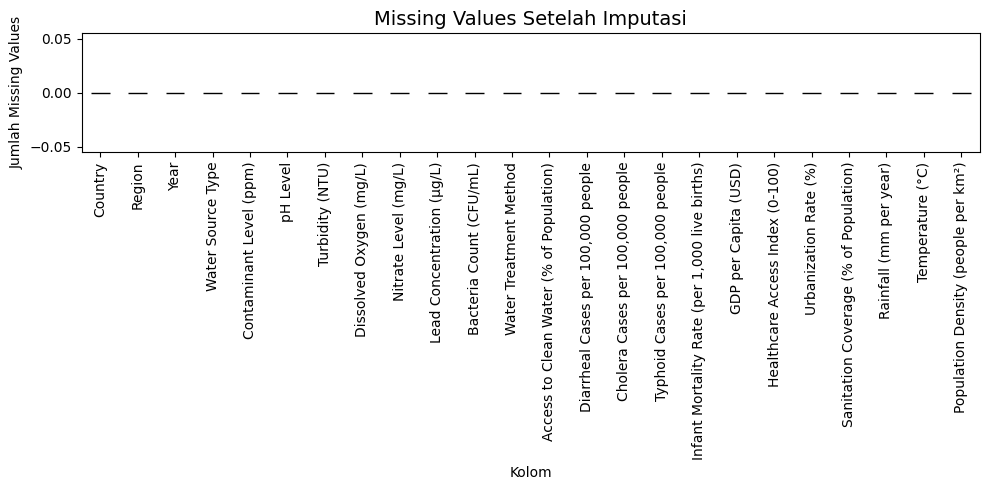

In [15]:
print("Penanganan missing values")
# Imputasi Mean (numerik) 
for col in num_cols:
    missing_count = uts[col].isnull().sum()
    if missing_count > 0:
        mean_val = uts[col].mean()
        uts[col] = uts[col].fillna(mean_val)
        print(f"Kolom '{col}' → {missing_count} nilai diisi dengan mean ({mean_val:.2f})")

# Imputasi Mode (kategorikal) 
for col in cat_cols:
    missing_count = uts[col].isnull().sum()
    if missing_count > 0:
        mode_val = uts[col].mode()[0]
        uts[col] = uts[col].fillna(mode_val)
        print(f"Kolom '{col}' → {missing_count} nilai diisi dengan mode ('{mode_val}')")

# Setelah imputasi 
print("\nJumlah missing values setelah imputasi:")
print(uts.isnull().sum())

# Cek Missing Values Setelah Imputasi 
plt.figure(figsize=(10, 5))
uts.isnull().sum().plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title("Missing Values Setelah Imputasi", fontsize=14)
plt.xlabel("Kolom")
plt.ylabel("Jumlah Missing Values")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

=== HANDLING OUTLIERS (WINSORIZATION) ===
 Mengecek distribusi data (skewness):



Turbidity (NTU)                                  0.047479
GDP per Capita (USD)                             0.029165
Infant Mortality Rate (per 1,000 live births)    0.021184
Nitrate Level (mg/L)                             0.018850
Access to Clean Water (% of Population)          0.017730
Typhoid Cases per 100,000 people                 0.016446
Dissolved Oxygen (mg/L)                          0.015727
Diarrheal Cases per 100,000 people               0.011658
Bacteria Count (CFU/mL)                          0.010984
Rainfall (mm per year)                           0.008513
Year                                             0.004847
Urbanization Rate (%)                            0.002250
Contaminant Level (ppm)                          0.000074
Temperature (°C)                                -0.009104
Cholera Cases per 100,000 people                -0.010776
Population Density (people per km²)             -0.011910
Healthcare Access Index (0-100)                 -0.012236
pH Level      


 Winsorization Handling selesai.

 Jumlah Outlier yang Ditemukan (Metode Winsorization):
 - Year: 0 outlier (batas bawah=2000.00, atas=2024.00)
 - Contaminant Level (ppm): 56 outlier (batas bawah=0.10, atas=9.90)
 - pH Level: 57 outlier (batas bawah=6.04, atas=8.47)
 - Turbidity (NTU): 47 outlier (batas bawah=0.06, atas=4.94)
 - Dissolved Oxygen (mg/L): 55 outlier (batas bawah=3.06, atas=9.93)
 - Nitrate Level (mg/L): 60 outlier (batas bawah=0.54, atas=49.64)
 - Lead Concentration (µg/L): 56 outlier (batas bawah=0.19, atas=19.78)
 - Bacteria Count (CFU/mL): 59 outlier (batas bawah=74.97, atas=4946.00)
 - Access to Clean Water (% of Population): 60 outlier (batas bawah=30.70, atas=99.24)
 - Diarrheal Cases per 100,000 people: 57 outlier (batas bawah=6.00, atas=495.00)
 - Cholera Cases per 100,000 people: 0 outlier (batas bawah=0.00, atas=49.00)
 - Typhoid Cases per 100,000 people: 22 outlier (batas bawah=0.00, atas=98.00)
 - Infant Mortality Rate (per 1,000 live births): 60 outlier (ba

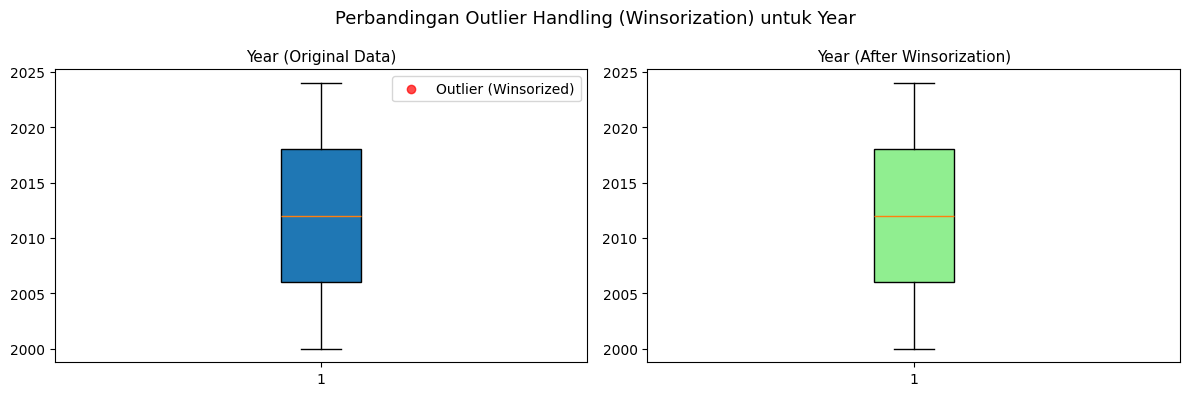

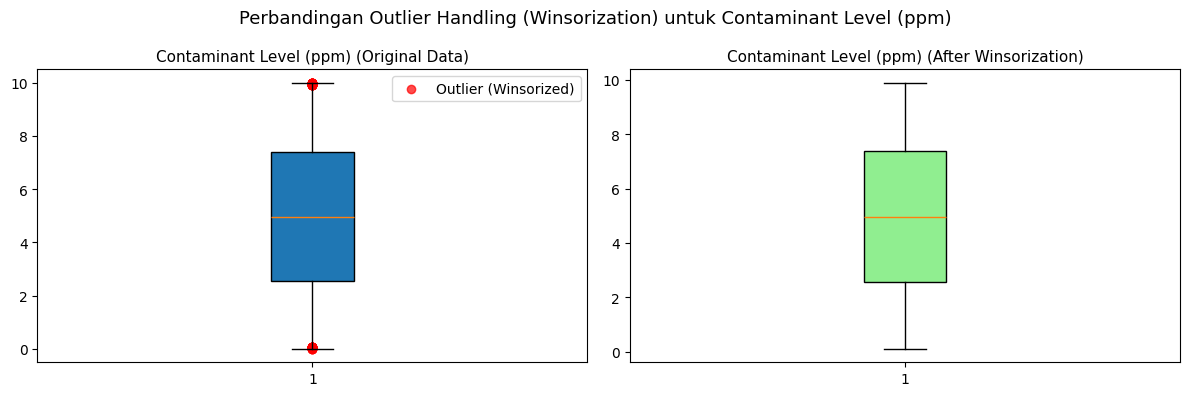

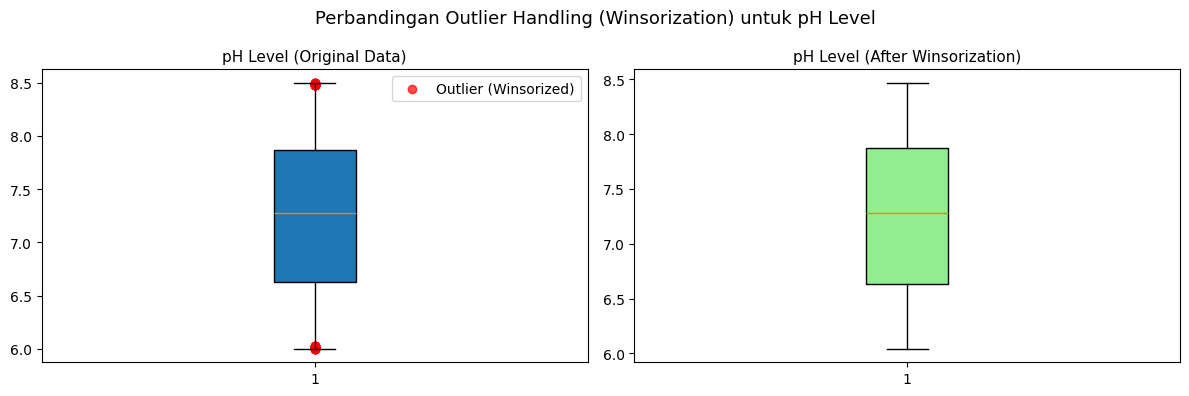

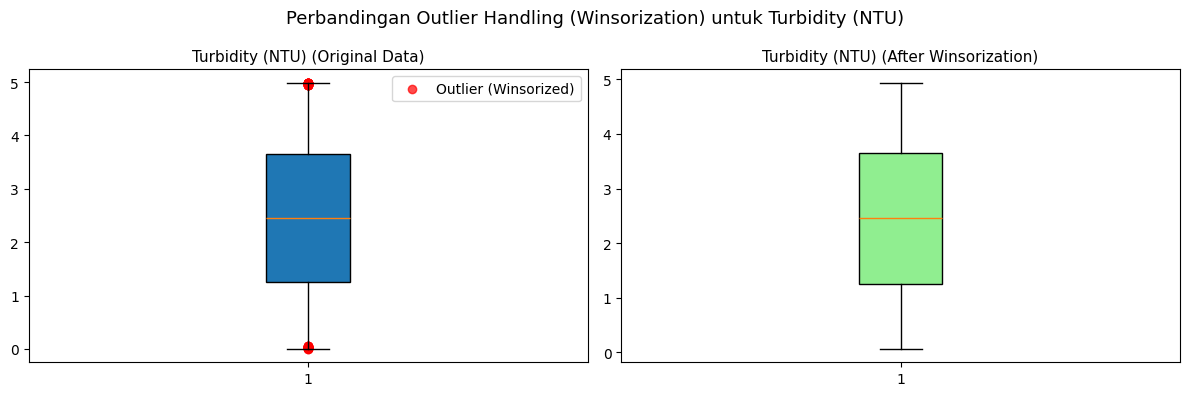

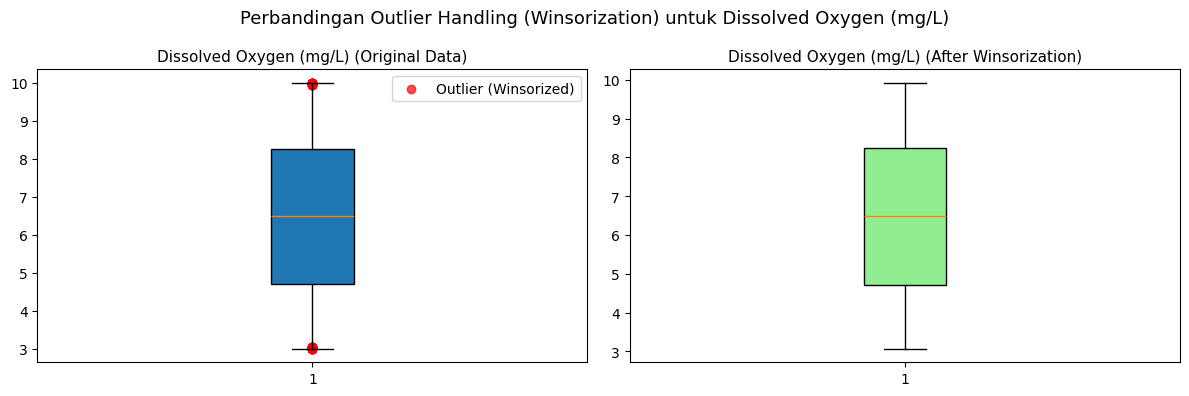

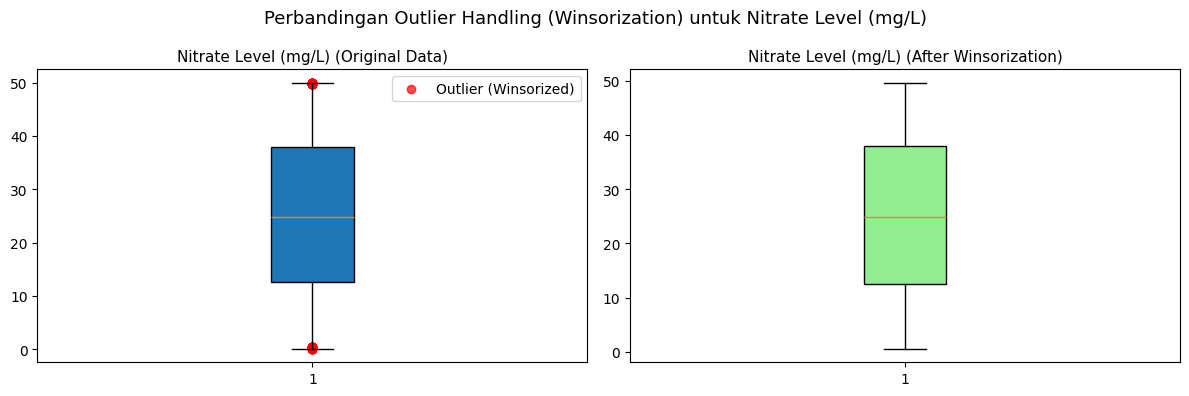

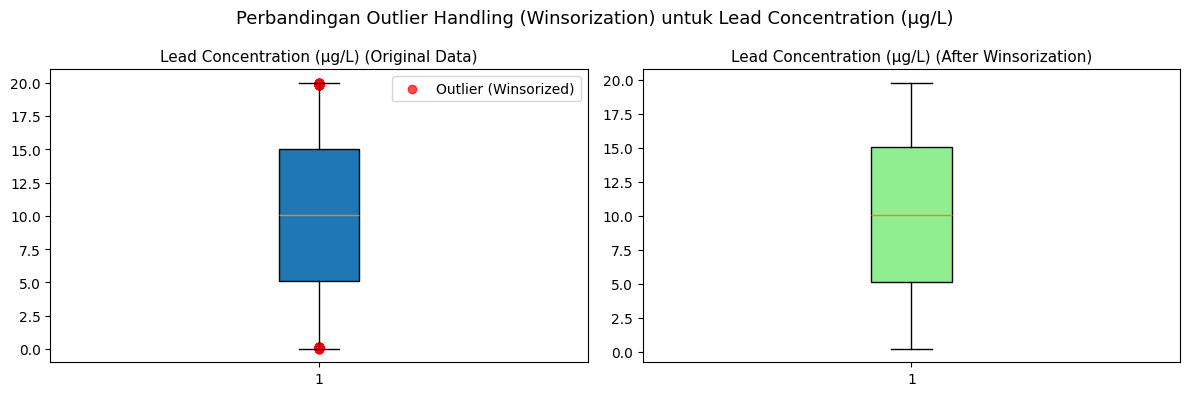

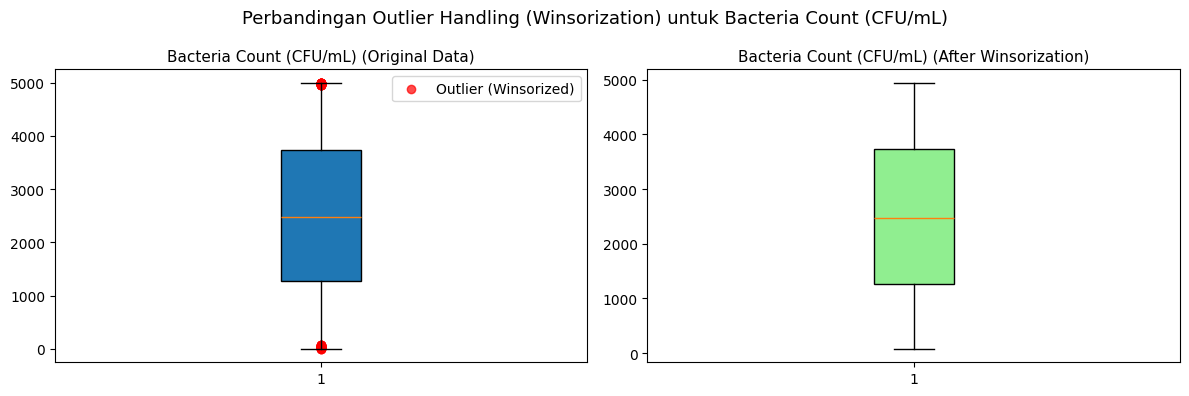

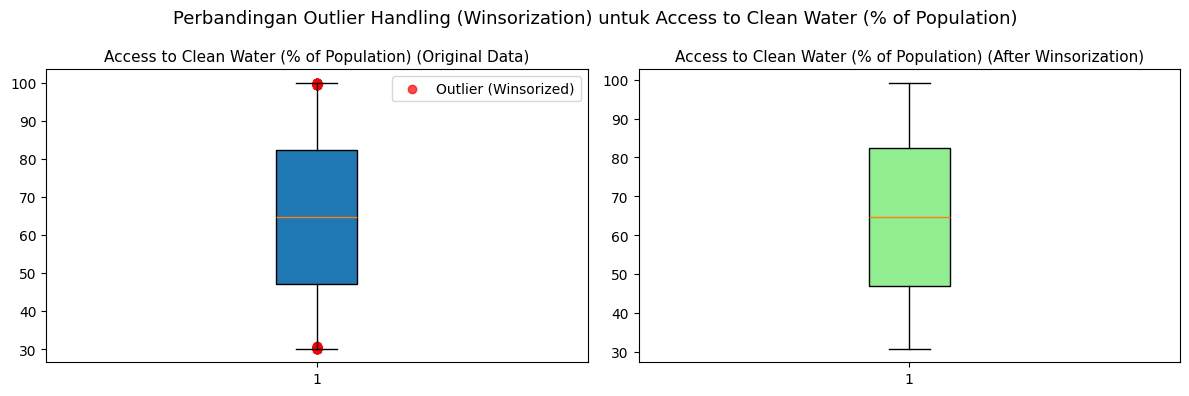

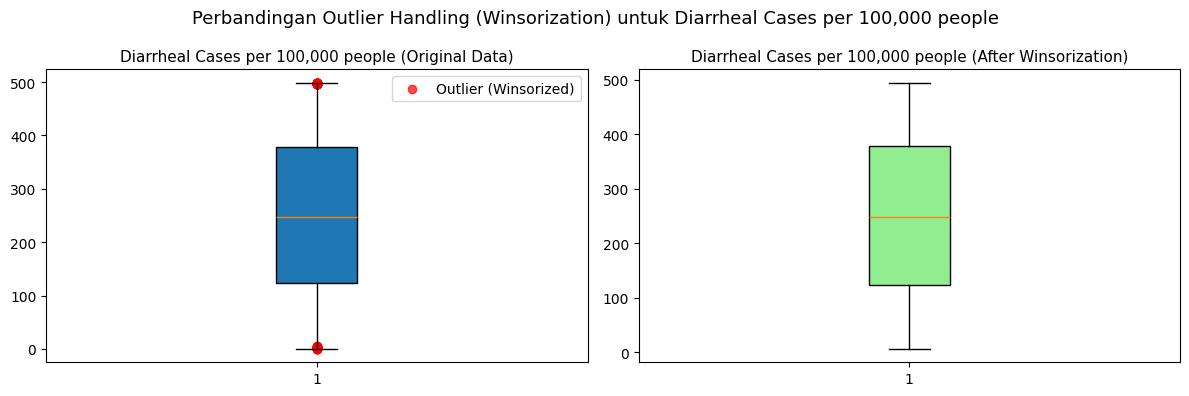

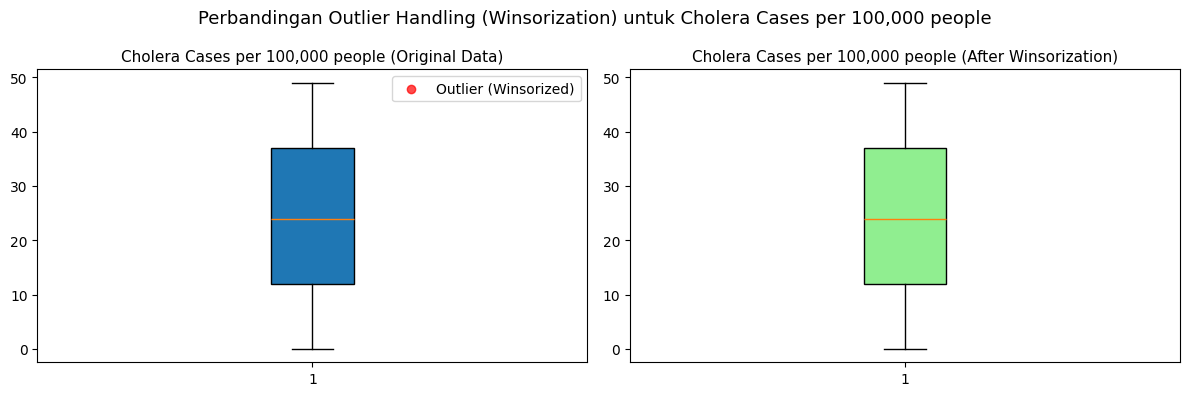

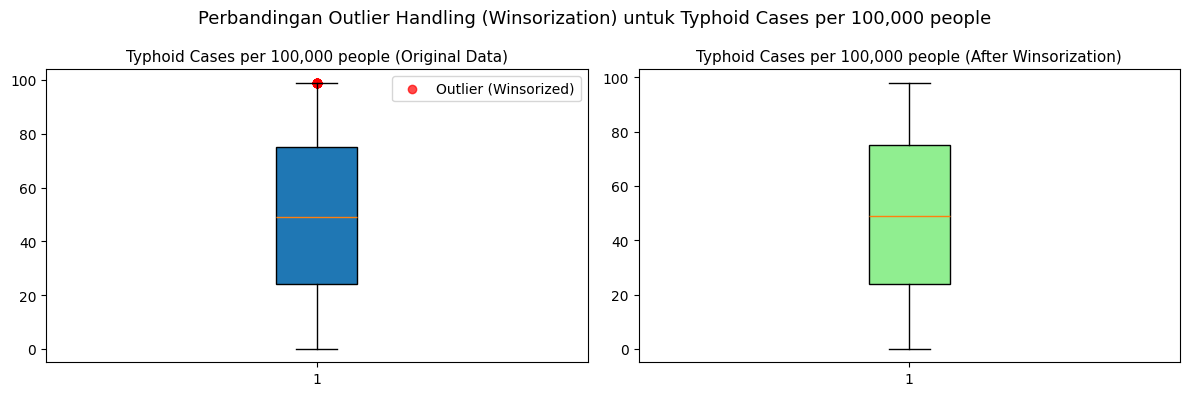

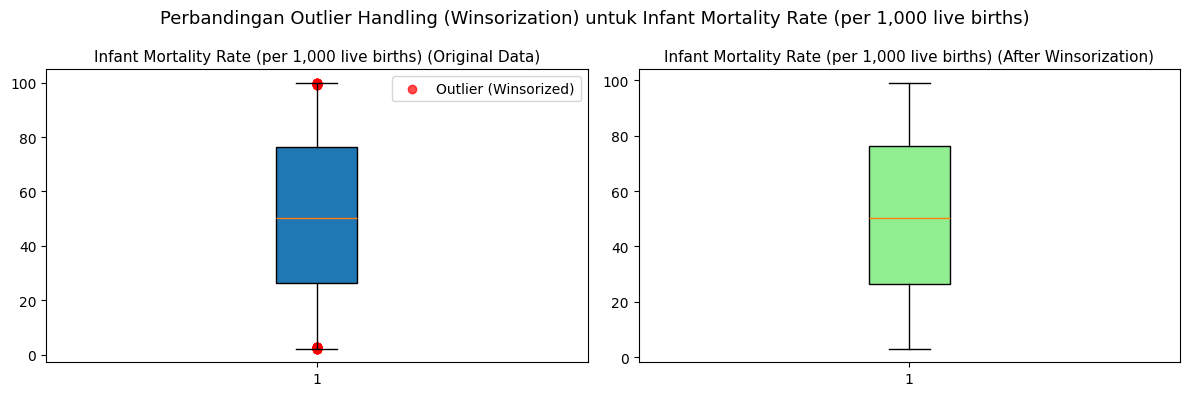

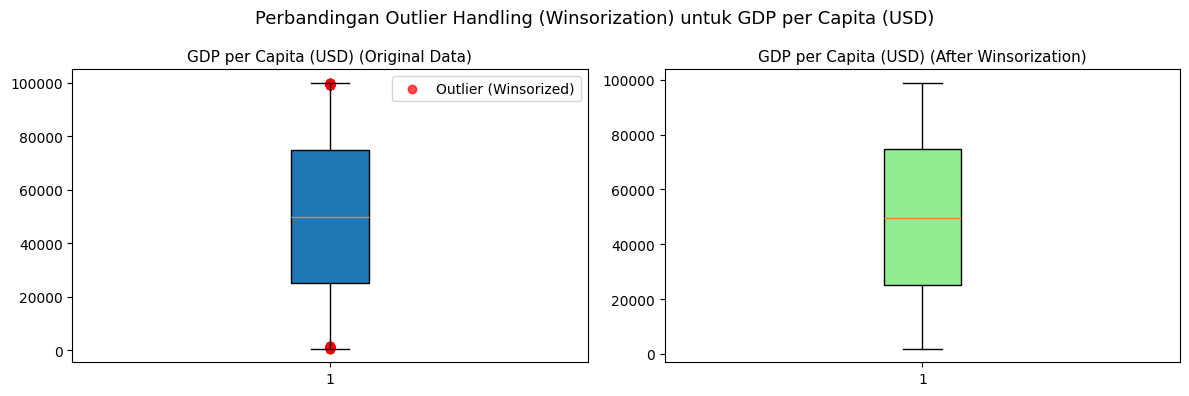

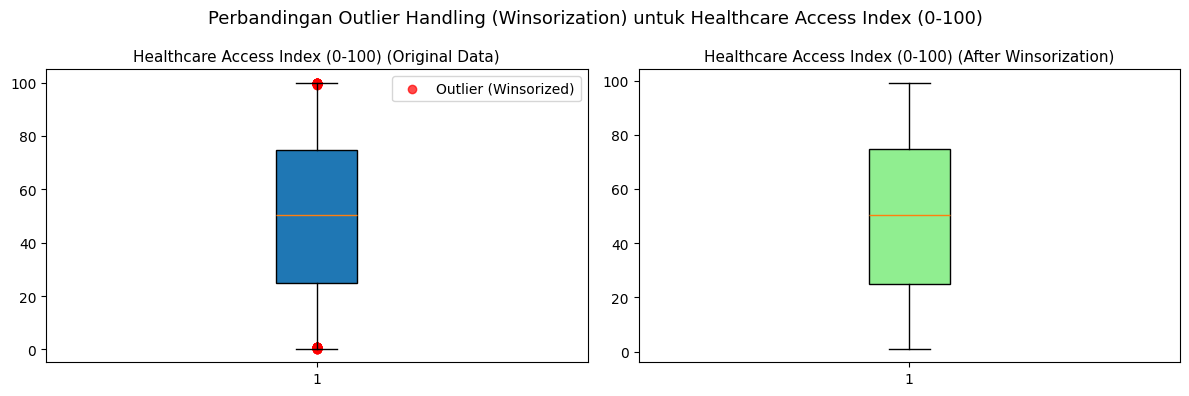

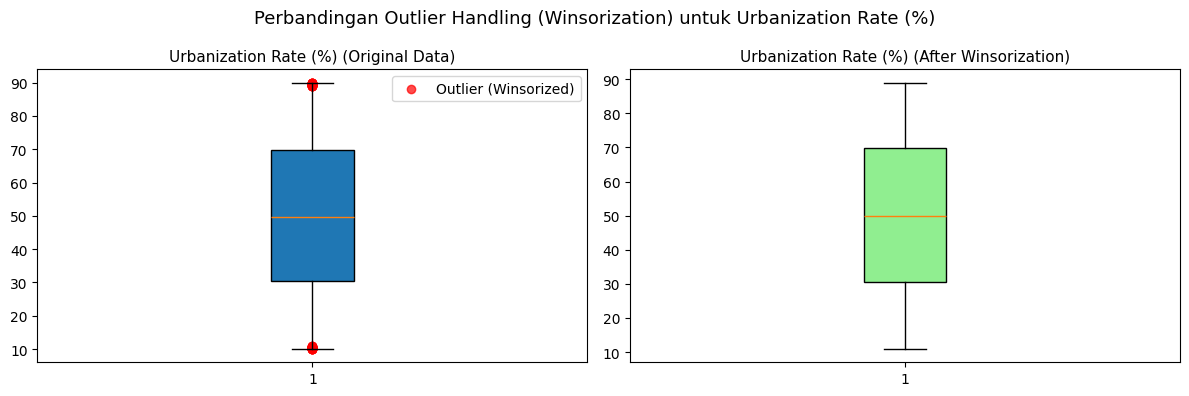

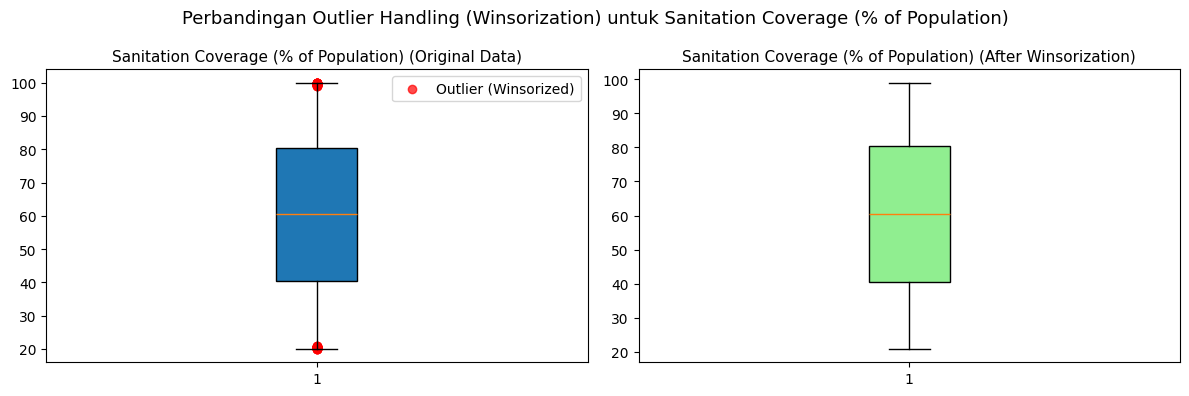

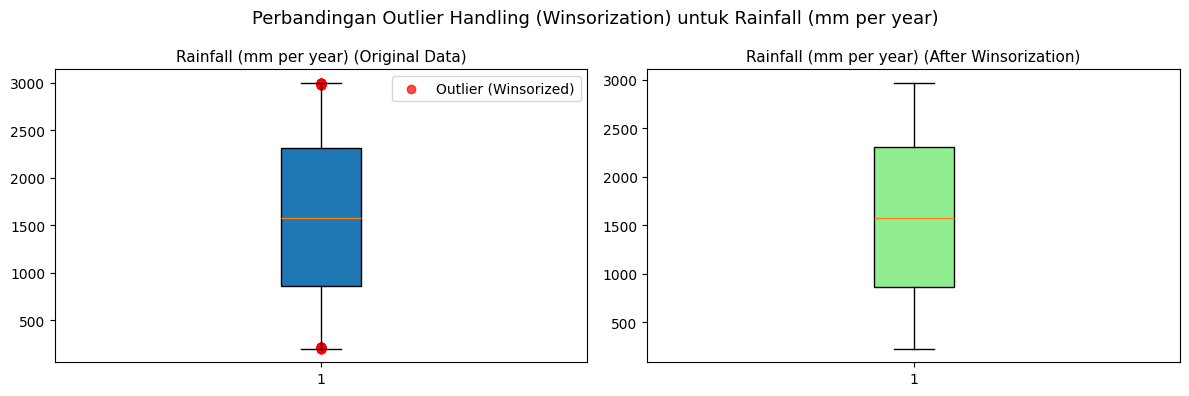

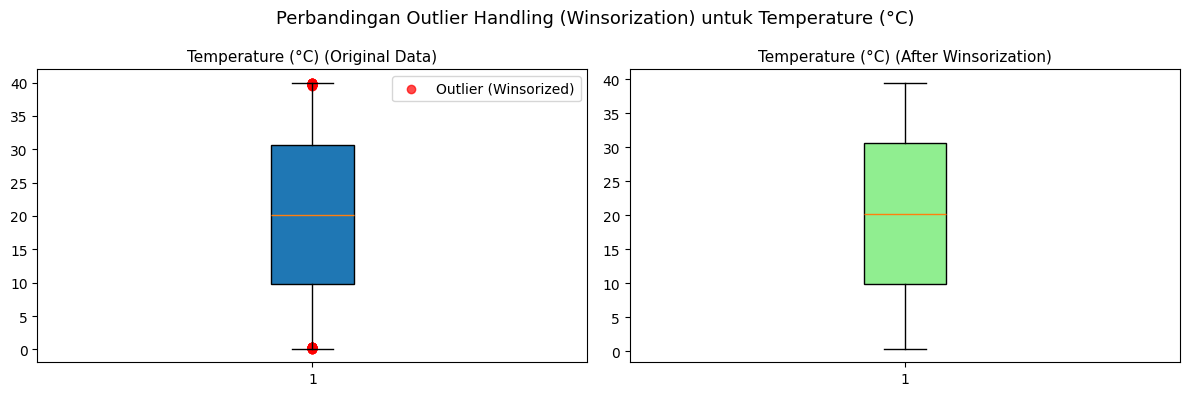

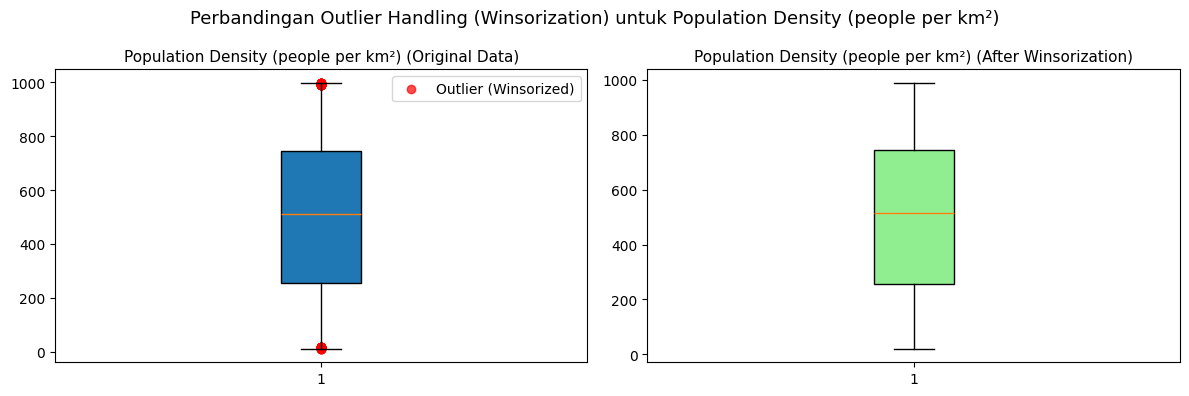


Statistik contoh kolom 'Contaminant Level (ppm)':


,Original,Winsorization
count,3000.000000,3000.000000
mean,4.954390,4.954347
std,2.860072,2.858420
min,0.000000,0.100000
25%,2.560000,2.560000
50%,4.950000,4.950000
75%,7.400000,7.400000
max,10.000000,9.900000


In [16]:
print("=== HANDLING OUTLIERS (WINSORIZATION) ===")
 
# Duplikat dataset
uts_winsor = uts.copy()

# Ambil kolom numerik
num_cols = uts.select_dtypes(include=['float64', 'int64']).columns

# Deteksi distribusi 
print(" Mengecek distribusi data (skewness):\n")
skewness = uts[num_cols].skew().sort_values(ascending=False)
display(skewness)

# Handling Outliers - Winsorization
winsor_outlier_counts = {}
winsor_limits = {}

for col in num_cols:
    # Tentukan batas bawah & atas (1% - 99%)
    lower_lim = uts[col].quantile(0.01)
    upper_lim = uts[col].quantile(0.99)

    # Simpan batas
    winsor_limits[col] = (lower_lim, upper_lim)

    # Deteksi outlier (berdasarkan Winsor limit)
    outliers = uts[(uts[col] < lower_lim) | (uts[col] > upper_lim)][col]
    winsor_outlier_counts[col] = len(outliers)

    # Terapkan Winsorization
    uts_winsor[col] = np.clip(uts[col], lower_lim, upper_lim)

print("\n Winsorization Handling selesai.\n")

# Ringkasan jumlah outlier
print(" Jumlah Outlier yang Ditemukan (Metode Winsorization):")
for col, count in winsor_outlier_counts.items():
    print(f" - {col}: {count} outlier (batas bawah={winsor_limits[col][0]:.2f}, atas={winsor_limits[col][1]:.2f})")

total_winsor = sum(winsor_outlier_counts.values())
print(f"\n Total outlier terdeteksi dengan Winsorization: {total_winsor}\n")

# Visualisasi Outlier (Original vs Winsorization)
for col in num_cols:
    plt.figure(figsize=(12, 4))

    # Data asli dengan highlight outlier
    plt.subplot(1, 2, 1)
    plt.boxplot(uts[col], patch_artist=True)
    plt.title(f"{col} (Original Data)", fontsize=11)

    # Tandai outlier secara eksplisit
    lower_lim, upper_lim = winsor_limits[col]
    outliers_data = uts[(uts[col] < lower_lim) | (uts[col] > upper_lim)]

    plt.scatter(
        x=np.ones(len(outliers_data)) * 1,  # posisi titik di tengah boxplot
        y=outliers_data[col],
        color='red', alpha=0.7, label='Outlier (Winsorized)'
    )
    plt.legend()

    # Data setelah Winsorization
    plt.subplot(1, 2, 2)
    plt.boxplot(uts_winsor[col], patch_artist=True, boxprops=dict(facecolor='lightgreen'))
    plt.title(f"{col} (After Winsorization)", fontsize=11)

    plt.suptitle(f"Perbandingan Outlier Handling (Winsorization) untuk {col}", fontsize=13)
    plt.tight_layout()
    plt.show()


# Statistik Ringkasan Contoh
contoh = num_cols[1]
print(f"\nStatistik contoh kolom '{contoh}':")
display(pd.DataFrame({
    'Original': uts[contoh].describe(),
    'Winsorization': uts_winsor[contoh].describe(),
}))

=== FUTURE SCALING (STANDARDIZATION) ===

=== 1. Standardization (Z-Score Scaling) ===

Sebelum Standardization:


,Year,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (µg/L),Bacteria Count (CFU/mL),Access to Clean Water (% of Population),"Diarrheal Cases per 100,000 people","Cholera Cases per 100,000 people","Typhoid Cases per 100,000 people","Infant Mortality Rate (per 1,000 live births)",GDP per Capita (USD),Healthcare Access Index (0-100),Urbanization Rate (%),Sanitation Coverage (% of Population),Rainfall (mm per year),Temperature (°C),Population Density (people per km²)
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2012.012667,4.954390,7.255847,2.480023,6.492850,25.08025,10.047913,2488.477333,64.612333,249.776667,24.25100,49.270000,50.811900,50036.196667,50.029193,50.062480,60.371007,1591.849000,20.130917,505.390333
std,7.229287,2.860072,0.720464,1.419984,2.027966,14.50517,5.798238,1431.421553,20.308463,144.111543,14.33259,28.984165,28.465323,28598.750508,28.896676,22.779125,23.159678,817.502434,11.689244,283.275224
min,2000.000000,0.000000,6.000000,0.000000,3.000000,0.05000,0.000000,0.000000,30.010000,0.000000,0.00000,0.000000,2.060000,521.000000,0.190000,10.030000,20.010000,200.000000,0.060000,10.000000
25%,2006.000000,2.560000,6.630000,1.257500,4.710000,12.52500,5.120000,1268.000000,47.027500,124.000000,12.00000,24.000000,26.467500,25010.250000,24.982500,30.557500,40.440000,865.750000,9.840000,254.750000
50%,2012.000000,4.950000,7.280000,2.460000,6.490000,24.79000,10.065000,2469.000000,64.780000,248.000000,24.00000,49.000000,50.230000,49621.500000,50.390000,49.795000,60.580000,1572.000000,20.175000,513.000000
75%,2018.000000,7.400000,7.870000,3.660000,8.252500,37.91000,15.032500,3736.250000,82.302500,378.000000,37.00000,75.000000,76.260000,74778.250000,74.817500,69.727500,80.420000,2308.250000,30.672500,745.000000
max,2024.000000,10.000000,8.500000,4.990000,10.000000,49.99000,20.000000,4998.000000,99.990000,499.000000,49.00000,99.000000,99.990000,99948.000000,99.980000,89.980000,99.990000,2999.000000,39.990000,999.000000



Sesudah Standardization:


,Year,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (µg/L),Bacteria Count (CFU/mL),Access to Clean Water (% of Population),"Diarrheal Cases per 100,000 people","Cholera Cases per 100,000 people","Typhoid Cases per 100,000 people","Infant Mortality Rate (per 1,000 live births)",GDP per Capita (USD),Healthcare Access Index (0-100),Urbanization Rate (%),Sanitation Coverage (% of Population),Rainfall (mm per year),Temperature (°C),Population Density (people per km²)
count,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03
mean,-1.099210e-14,-2.368476e-17,-1.421085e-16,2.155313e-16,1.089499e-16,3.671137e-17,2.480978e-16,4.500104e-17,-2.948752e-16,-2.960595e-17,-8.171241e-17,-1.142790e-16,-4.973799e-17,1.258253e-16,-1.968795e-16,-2.842171e-17,-2.925068e-16,9.000208e-17,-9.237056e-17,9.473903e-18
std,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00
min,-1.661944e+00,-1.732549e+00,-1.743400e+00,-1.746806e+00,-1.722629e+00,-1.725897e+00,-1.733214e+00,-1.738756e+00,-1.704122e+00,-1.733507e+00,-1.692300e+00,-1.700177e+00,-1.712962e+00,-1.731665e+00,-1.725025e+00,-1.757713e+00,-1.743018e+00,-1.702846e+00,-1.717328e+00,-1.749087e+00
25%,-8.318481e-01,-8.373178e-01,-8.688170e-01,-8.610852e-01,-8.792786e-01,-8.657150e-01,-8.500401e-01,-8.527752e-01,-8.660313e-01,-8.729185e-01,-8.549077e-01,-8.720007e-01,-8.553726e-01,-8.752172e-01,-8.669118e-01,-8.564083e-01,-8.607343e-01,-8.883399e-01,-8.805217e-01,-8.849419e-01
50%,-1.752424e-03,-1.535182e-03,3.353030e-02,-1.410345e-02,-1.405583e-03,-2.001344e-02,2.947363e-03,-1.360925e-02,8.257376e-03,-1.233047e-02,-1.751546e-02,-9.316984e-03,-2.044583e-02,-1.450293e-02,1.248818e-02,-1.174429e-02,9.025521e-03,-2.428410e-02,3.771902e-03,2.686763e-02
75%,8.283433e-01,8.552294e-01,8.525840e-01,8.311174e-01,8.678367e-01,8.846424e-01,8.598160e-01,8.718471e-01,8.712189e-01,8.898989e-01,8.896595e-01,8.878741e-01,8.941526e-01,8.652888e-01,8.579685e-01,8.634352e-01,8.658296e-01,8.764750e-01,9.019694e-01,8.459957e-01
max,1.658439e+00,1.764449e+00,1.727167e+00,1.767904e+00,1.729681e+00,1.717588e+00,1.716685e+00,1.753460e+00,1.742306e+00,1.729666e+00,1.727052e+00,1.716051e+00,1.727937e+00,1.745535e+00,1.728889e+00,1.752665e+00,1.710974e+00,1.721567e+00,1.699203e+00,1.742800e+00


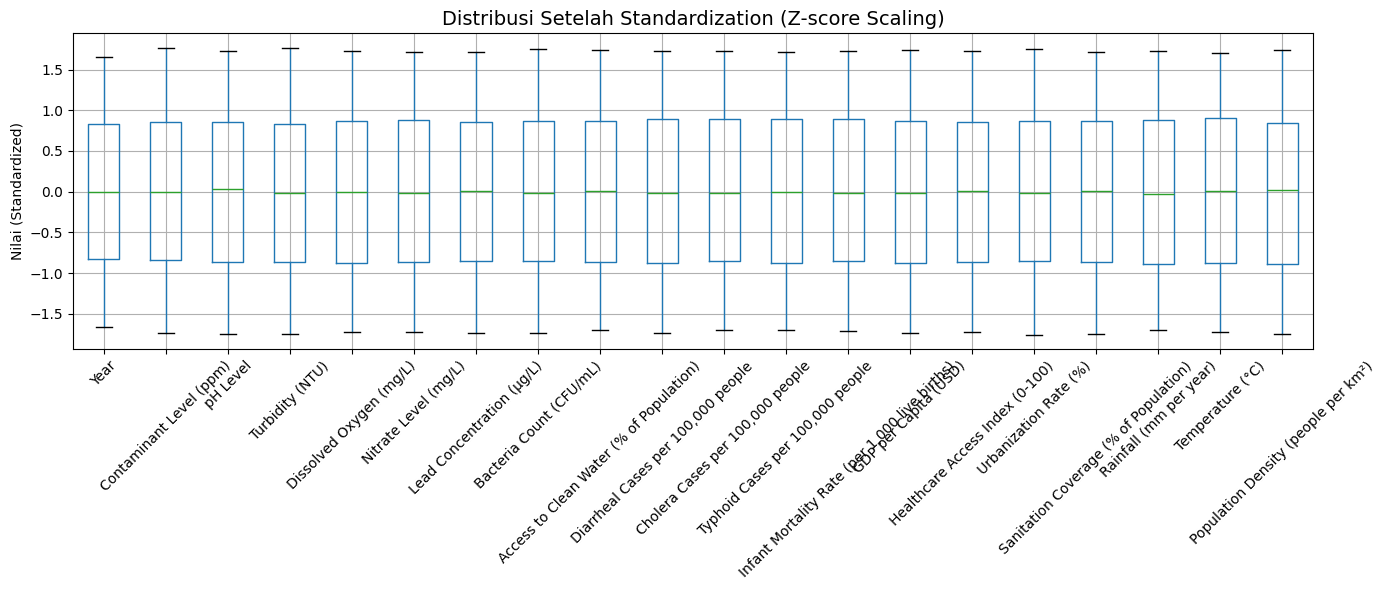

In [17]:
print("=== FUTURE SCALING (STANDARDIZATION) ===")

print("\n=== 1. Standardization (Z-Score Scaling) ===")
scaler = StandardScaler()
uts_standardized = uts.copy()
uts_standardized[num_cols] = scaler.fit_transform(uts[num_cols])

# Statistik Sebelum dan Sesudah 
print("\nSebelum Standardization:")
display(uts[num_cols].describe())

print("\nSesudah Standardization:")
display(pd.DataFrame(uts_standardized[num_cols], columns=num_cols).describe())

# Visualisasi Boxplot 
plt.figure(figsize=(14,6))
uts_standardized[num_cols].boxplot(rot=45)
plt.title("Distribusi Setelah Standardization (Z-score Scaling)", fontsize=14)
plt.ylabel("Nilai (Standardized)")
plt.tight_layout()
plt.show()


=== 2. Normalization (Min–Max Scaling) ===

Sebelum Normalization:


,Year,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (µg/L),Bacteria Count (CFU/mL),Access to Clean Water (% of Population),"Diarrheal Cases per 100,000 people","Cholera Cases per 100,000 people","Typhoid Cases per 100,000 people","Infant Mortality Rate (per 1,000 live births)",GDP per Capita (USD),Healthcare Access Index (0-100),Urbanization Rate (%),Sanitation Coverage (% of Population),Rainfall (mm per year),Temperature (°C),Population Density (people per km²)
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2012.012667,4.954390,7.255847,2.480023,6.492850,25.08025,10.047913,2488.477333,64.612333,249.776667,24.25100,49.270000,50.811900,50036.196667,50.029193,50.062480,60.371007,1591.849000,20.130917,505.390333
std,7.229287,2.860072,0.720464,1.419984,2.027966,14.50517,5.798238,1431.421553,20.308463,144.111543,14.33259,28.984165,28.465323,28598.750508,28.896676,22.779125,23.159678,817.502434,11.689244,283.275224
min,2000.000000,0.000000,6.000000,0.000000,3.000000,0.05000,0.000000,0.000000,30.010000,0.000000,0.00000,0.000000,2.060000,521.000000,0.190000,10.030000,20.010000,200.000000,0.060000,10.000000
25%,2006.000000,2.560000,6.630000,1.257500,4.710000,12.52500,5.120000,1268.000000,47.027500,124.000000,12.00000,24.000000,26.467500,25010.250000,24.982500,30.557500,40.440000,865.750000,9.840000,254.750000
50%,2012.000000,4.950000,7.280000,2.460000,6.490000,24.79000,10.065000,2469.000000,64.780000,248.000000,24.00000,49.000000,50.230000,49621.500000,50.390000,49.795000,60.580000,1572.000000,20.175000,513.000000
75%,2018.000000,7.400000,7.870000,3.660000,8.252500,37.91000,15.032500,3736.250000,82.302500,378.000000,37.00000,75.000000,76.260000,74778.250000,74.817500,69.727500,80.420000,2308.250000,30.672500,745.000000
max,2024.000000,10.000000,8.500000,4.990000,10.000000,49.99000,20.000000,4998.000000,99.990000,499.000000,49.00000,99.000000,99.990000,99948.000000,99.980000,89.980000,99.990000,2999.000000,39.990000,999.000000



Sesudah Normalization:


,Year,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (µg/L),Bacteria Count (CFU/mL),Access to Clean Water (% of Population),"Diarrheal Cases per 100,000 people","Cholera Cases per 100,000 people","Typhoid Cases per 100,000 people","Infant Mortality Rate (per 1,000 live births)",GDP per Capita (USD),Healthcare Access Index (0-100),Urbanization Rate (%),Sanitation Coverage (% of Population),Rainfall (mm per year),Temperature (°C),Population Density (people per km²)
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.500528,0.495439,0.502339,0.496999,0.498979,0.501206,0.502396,0.497895,0.494460,0.500554,0.494918,0.497677,0.497824,0.498006,0.499441,0.500719,0.504639,0.497267,0.502653,0.500900
std,0.301220,0.286007,0.288185,0.284566,0.289709,0.290452,0.289912,0.286399,0.290204,0.288801,0.292502,0.292769,0.290670,0.287636,0.289575,0.284917,0.289568,0.292069,0.292743,0.286426
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.256000,0.252000,0.252004,0.244286,0.249800,0.256000,0.253701,0.243177,0.248497,0.244898,0.242424,0.249234,0.246304,0.248447,0.256754,0.255439,0.237853,0.244929,0.247472
50%,0.500000,0.495000,0.512000,0.492986,0.498571,0.495394,0.503250,0.493998,0.496856,0.496994,0.489796,0.494949,0.491882,0.493835,0.503056,0.497373,0.507252,0.490175,0.503757,0.508595
75%,0.750000,0.740000,0.748000,0.733467,0.750357,0.758110,0.751625,0.747549,0.747249,0.757515,0.755102,0.757576,0.757684,0.746852,0.747845,0.746685,0.755314,0.753215,0.766654,0.743175
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


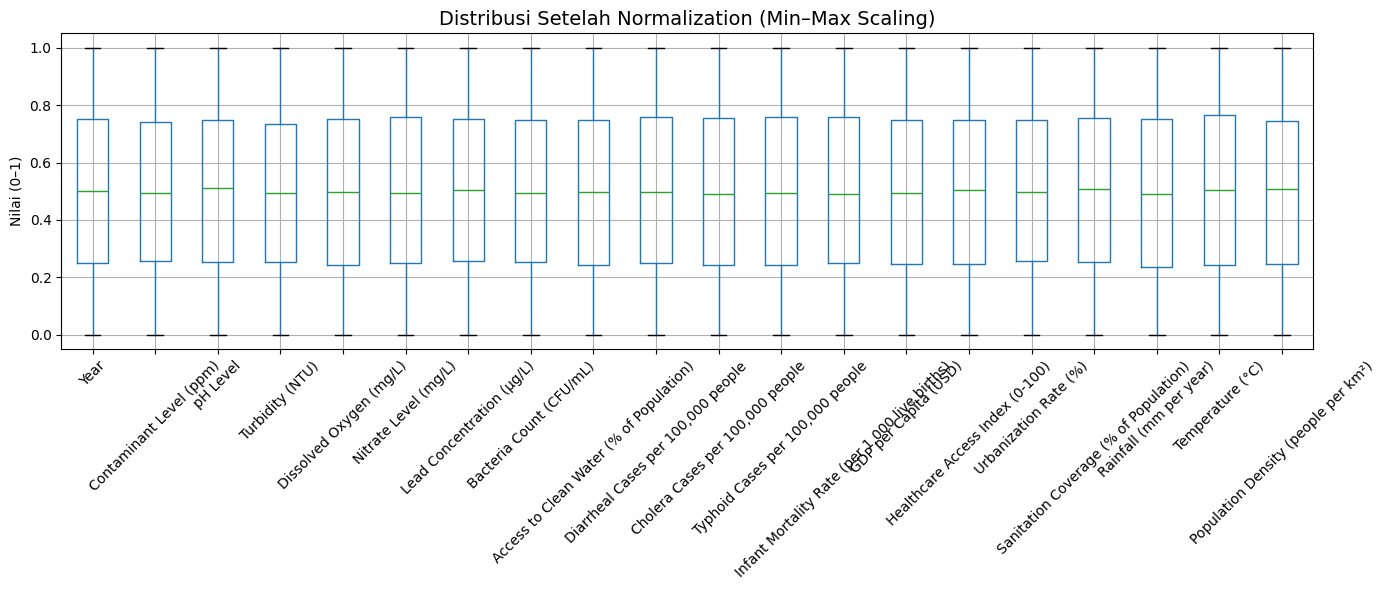

In [18]:
print("\n=== 2. Normalization (Min–Max Scaling) ===")

minmax_scaler = MinMaxScaler()
uts_normalized = uts.copy()
uts_normalized[num_cols] = minmax_scaler.fit_transform(uts[num_cols])

# Statistik Sebelum dan Sesudah 
print("\nSebelum Normalization:")
display(uts[num_cols].describe())

print("\nSesudah Normalization:")
display(pd.DataFrame(uts_normalized[num_cols], columns=num_cols).describe())

# Visualisasi Boxplot 
plt.figure(figsize=(14,6))
uts_normalized[num_cols].boxplot(rot=45)
plt.title("Distribusi Setelah Normalization (Min–Max Scaling)", fontsize=14)
plt.ylabel("Nilai (0–1)")
plt.tight_layout()
plt.show()

=== Perbandingan Visual Original dengan Future Scaling (Histogram) ===


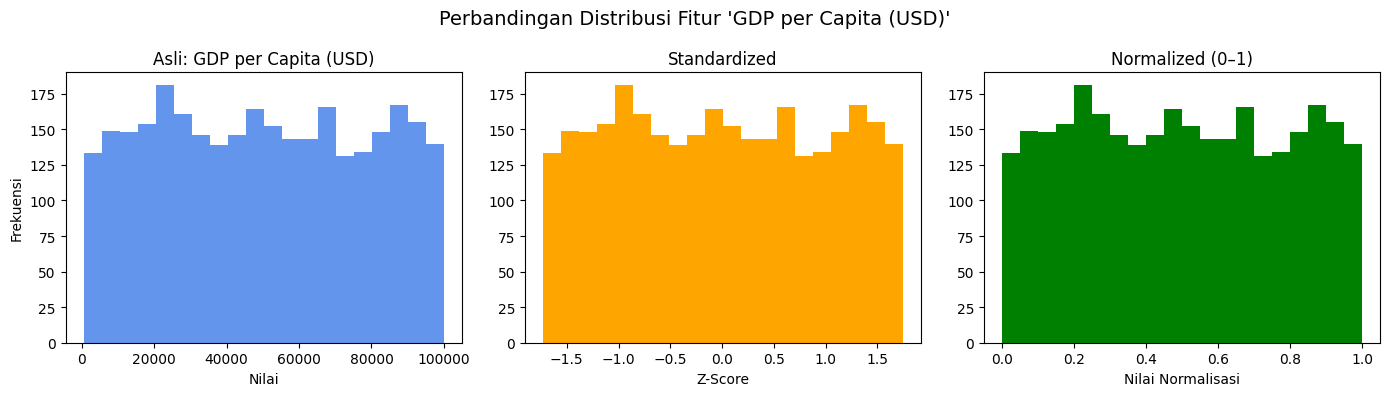

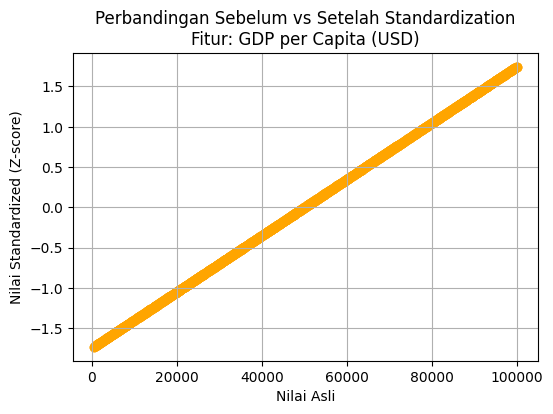

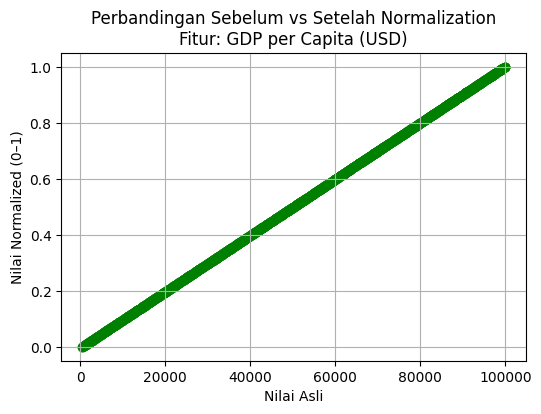

In [19]:
print("=== Perbandingan Visual Original dengan Future Scaling (Histogram) ===")
# Pilih kolom numerik representatif 
cols_sample = ['GDP per Capita (USD)']
cols_sample = [c for c in cols_sample if c in num_cols] 

for col in cols_sample:
    plt.figure(figsize=(14,4))
    plt.subplot(1,3,1)
    plt.hist(uts[col], bins=20, color='cornflowerblue')
    plt.title(f"Asli: {col}")
    plt.xlabel("Nilai")
    plt.ylabel("Frekuensi")

    plt.subplot(1,3,2)
    plt.hist(uts_standardized[col], bins=20, color='orange')
    plt.title("Standardized")
    plt.xlabel("Z-Score")

    plt.subplot(1,3,3)
    plt.hist(uts_normalized[col], bins=20, color='green')
    plt.title("Normalized (0–1)")
    plt.xlabel("Nilai Normalisasi")

    plt.suptitle(f"Perbandingan Distribusi Fitur '{col}'", fontsize=14)
    plt.tight_layout()
    plt.show()

# VISUALISASI PERUBAHAN NILAI (Sebelum vs Sesudah)

for col in cols_sample:
    plt.figure(figsize=(6,4))
    plt.scatter(uts[col], uts_standardized[col], alpha=0.6, color='orange')
    plt.title(f"Perbandingan Sebelum vs Setelah Standardization\nFitur: {col}")
    plt.xlabel("Nilai Asli")
    plt.ylabel("Nilai Standardized (Z-score)")
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6,4))
    plt.scatter(uts[col], uts_normalized[col], alpha=0.6, color='green')
    plt.title(f"Perbandingan Sebelum vs Setelah Normalization\nFitur: {col}")
    plt.xlabel("Nilai Asli")
    plt.ylabel("Nilai Normalized (0–1)")
    plt.grid(True)
    plt.show()

In [20]:
print("=== ENCODING CATEGORICAL VARIABLES (ONE-HOT) ===")
from sklearn.preprocessing import OneHotEncoder

cat_cols = uts.select_dtypes(include=['object']).columns

print("Kolom kategorikal yang akan di-encode:")
print(cat_cols.tolist())

# Lakukan One-Hot Encoding menggunakan pandas 
uts_onehot = pd.get_dummies(uts, columns=cat_cols, drop_first=True)

print("\n One-Hot Encoding selesai.")
print(f"Jumlah kolom kategorikal sebelum encoding: {len(cat_cols)}")
print(f"Jumlah kolom total setelah encoding: {uts_onehot.shape[1]}")

# hasil encoding 
print("\nPreview hasil encoding (5 baris teratas):")
display(uts_onehot.head())

# tampilkan nama kolom baru yang terbentuk 
new_columns = [col for col in uts_onehot.columns if col not in uts.columns]
print("\nKolom baru hasil One-Hot Encoding:")
print(new_columns)


=== ENCODING CATEGORICAL VARIABLES (ONE-HOT) ===
Kolom kategorikal yang akan di-encode:
['Country', 'Region', 'Water Source Type', 'Water Treatment Method']

 One-Hot Encoding selesai.
Jumlah kolom kategorikal sebelum encoding: 4
Jumlah kolom total setelah encoding: 40

Preview hasil encoding (5 baris teratas):


,Year,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (µg/L),Bacteria Count (CFU/mL),Access to Clean Water (% of Population),"Diarrheal Cases per 100,000 people",...,Region_North,Region_South,Region_West,Water Source Type_Pond,Water Source Type_River,Water Source Type_Spring,Water Source Type_Tap,Water Source Type_Well,Water Treatment Method_Chlorination,Water Treatment Method_Filtration
0,2015,6.06,7.12,3.93,4.28,8.28,7.89,3344,33.60,472,...,True,False,False,False,False,False,False,False,False,True
1,2017,5.24,7.84,4.79,3.86,15.74,14.68,2122,89.54,122,...,False,False,True,False,False,False,False,True,False,False
2,2022,0.24,6.43,0.79,3.42,36.67,9.96,2330,35.29,274,...,False,False,False,True,False,False,False,False,False,False
3,2016,7.91,6.71,1.96,3.12,36.92,6.77,3779,57.53,3,...,False,False,False,False,False,False,False,True,False,False
4,2005,0.12,8.16,4.22,9.15,49.35,12.51,4182,36.60,466,...,False,True,False,False,False,False,False,True,False,True



Kolom baru hasil One-Hot Encoding:
['Country_Brazil', 'Country_China', 'Country_Ethiopia', 'Country_India', 'Country_Indonesia', 'Country_Mexico', 'Country_Nigeria', 'Country_Pakistan', 'Country_USA', 'Region_East', 'Region_North', 'Region_South', 'Region_West', 'Water Source Type_Pond', 'Water Source Type_River', 'Water Source Type_Spring', 'Water Source Type_Tap', 'Water Source Type_Well', 'Water Treatment Method_Chlorination', 'Water Treatment Method_Filtration']


=== FEATURE SELECTION / REDUCTION (PCA, FEATURE IMPORTANCE) ===

 Target kolom yang digunakan: Diarrheal Cases per 100,000 people
Jumlah fitur numerik yang digunakan: 19 kolom

--- 1. PCA (Principal Component Analysis) ---

Proporsi Variansi yang Dijelaskan oleh Tiap Komponen PCA:
Komponen 1: 6.03%
Komponen 2: 5.84%
Komponen 3: 5.78%


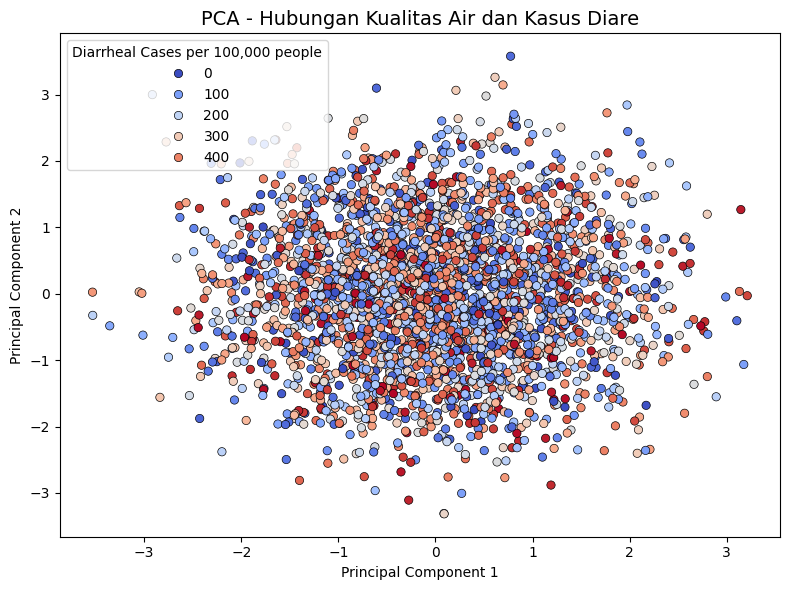


--- 2. FEATURE IMPORTANCE (Random Forest Regressor) ---

Top 10 Fitur Paling Penting:


,Feature,Importance
7,Bacteria Count (CFU/mL),0.058560
16,Rainfall (mm per year),0.058317
15,Sanitation Coverage (% of Population),0.057867
13,Healthcare Access Index (0-100),0.055109
17,Temperature (°C),0.055098
5,Nitrate Level (mg/L),0.054874
11,"Infant Mortality Rate (per 1,000 live births)",0.054550
18,Population Density (people per km²),0.054403
14,Urbanization Rate (%),0.054310
1,Contaminant Level (ppm),0.053598


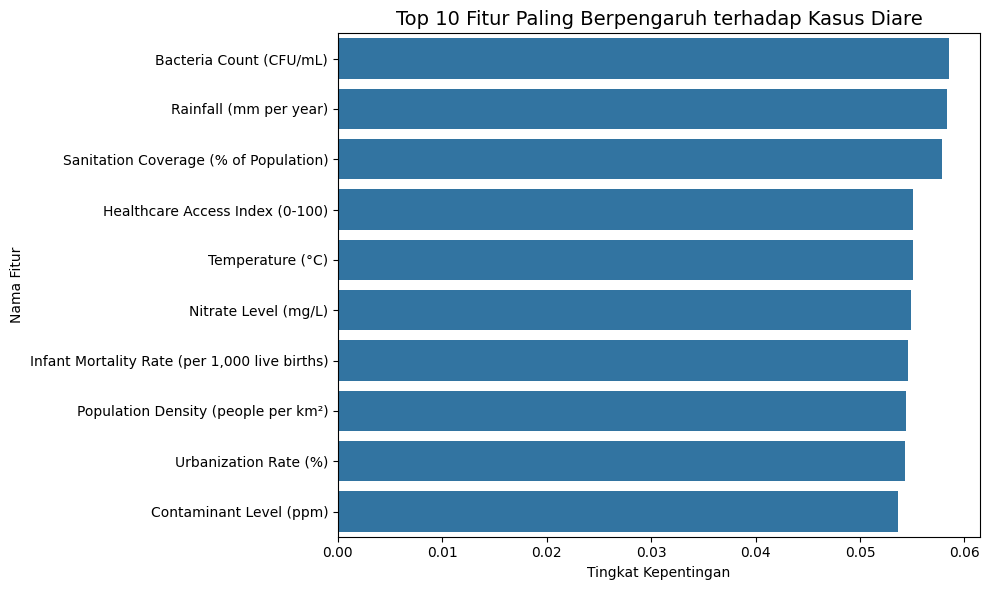

In [21]:
print("=== FEATURE SELECTION / REDUCTION (PCA, FEATURE IMPORTANCE) ===")
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

# Tentukan target kolom
target_col = "Diarrheal Cases per 100,000 people"
print(f"\n Target kolom yang digunakan: {target_col}")

# Pisahkan fitur numerik dan target
X = uts.select_dtypes(include=[np.number]).drop(columns=[target_col], errors='ignore')
y = uts[target_col]

print(f"Jumlah fitur numerik yang digunakan: {X.shape[1]} kolom")

print("\n--- 1. PCA (Principal Component Analysis) ---")

# Normalisasi fitur numerik sebelum PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Terapkan PCA dengan 3 komponen utama
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Buat DataFrame hasil PCA
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])

# Tampilkan persentase varian yang dijelaskan
explained_var = pca.explained_variance_ratio_
print("\nProporsi Variansi yang Dijelaskan oleh Tiap Komponen PCA:")
for i, val in enumerate(explained_var, start=1):
    print(f"Komponen {i}: {val*100:.2f}%")

# Visualisasi PCA (2D)
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=y, palette='coolwarm', edgecolor='black')
plt.title('PCA - Hubungan Kualitas Air dan Kasus Diare', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

print("\n--- 2. FEATURE IMPORTANCE (Random Forest Regressor) ---")

# Buat model Random Forest untuk melihat fitur yang paling berpengaruh
rf_model = RandomForestRegressor(random_state=42, n_estimators=200)
rf_model.fit(X, y)

# Ambil hasil importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Fitur Paling Penting:")
display(importance.head(10))

# Visualisasi Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance.head(10))
plt.title('Top 10 Fitur Paling Berpengaruh terhadap Kasus Diare', fontsize=14)
plt.xlabel('Tingkat Kepentingan')
plt.ylabel('Nama Fitur')
plt.tight_layout()
plt.show()

In [22]:
print("===== STATISTICAL ANALYSIS =====")

===== STATISTICAL ANALYSIS =====


=== PARAMETRIC TEST (PEARSON CORRELATION) ===
PARAMETRIC TEST: Pearson Correlation
Koefisien Pearson (r): -0.0106
p-value: 0.562486
95% Confidence Interval: [-0.0462, 0.0257]
Effect Size: Kecil
Tidak signifikan: Tidak ada hubungan linear yang kuat.


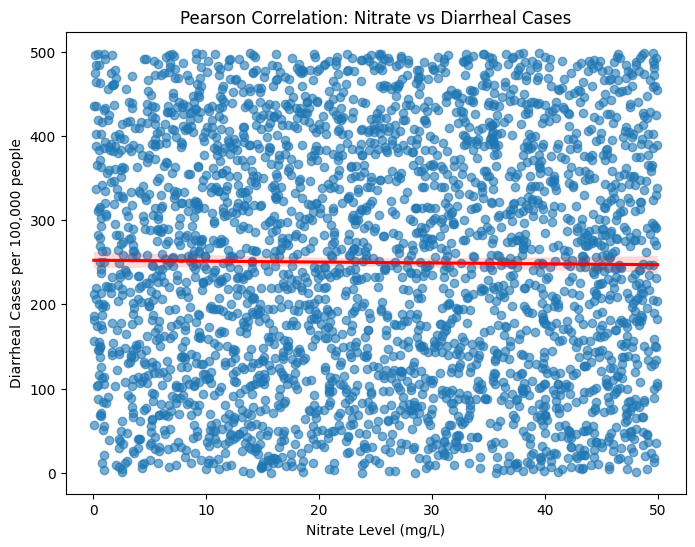


=== NON-PARAMETRIC TEST (SPEARMAN CORRELATION) ===

NON-PARAMETRIC TEST: Spearman Correlation
Koefisien Spearman (ρ): 0.0153
p-value: 0.403452
95% Confidence Interval: [-0.0199, 0.0524]
Effect Size: Kecil
Tidak signifikan: Tidak ada hubungan monotonik yang kuat.


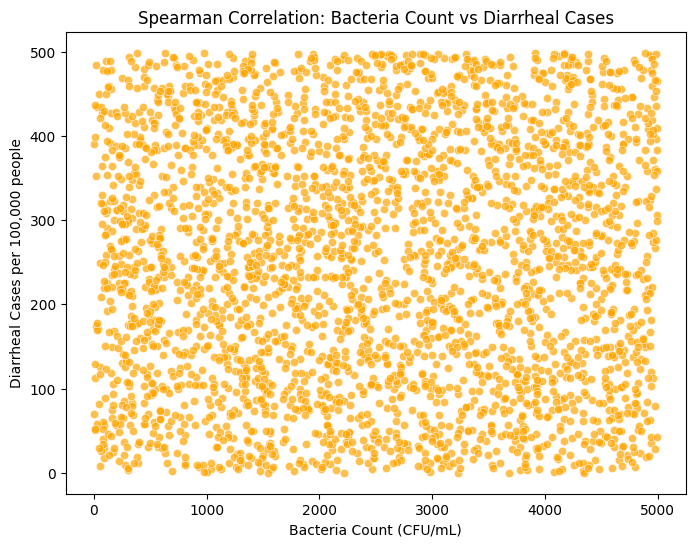

In [23]:
print("=== PARAMETRIC TEST (PEARSON CORRELATION) ===")

x = uts["Nitrate Level (mg/L)"]
y = uts["Diarrheal Cases per 100,000 people"]

pearson_corr, pearson_p = stats.pearsonr(x, y)

# Hitung 95% CI dengan bootstrap
np.random.seed(42)
bootstraps = []
for _ in range(2000):
    idx = np.random.choice(range(len(x)), len(x), replace=True)
    boot_corr, _ = stats.pearsonr(x.iloc[idx], y.iloc[idx])
    bootstraps.append(boot_corr)
ci_lower, ci_upper = np.percentile(bootstraps, [2.5, 97.5])

print("PARAMETRIC TEST: Pearson Correlation")
print(f"Koefisien Pearson (r): {pearson_corr:.4f}")
print(f"p-value: {pearson_p:.6f}")
print(f"95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")
print("Effect Size:", 
      "Kecil" if abs(pearson_corr)<0.3 else "Sedang" if abs(pearson_corr)<0.5 else "Kuat")

if pearson_p < 0.05:
    print("Signifikan: Ada hubungan linear antara Nitrat dan Kasus Diare.")
else:
    print("Tidak signifikan: Tidak ada hubungan linear yang kuat.")

# Visualisasi Pearson
plt.figure(figsize=(8,6))
sns.regplot(x=x, y=y, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title("Pearson Correlation: Nitrate vs Diarrheal Cases")
plt.xlabel("Nitrate Level (mg/L)")
plt.ylabel("Diarrheal Cases per 100,000 people")
plt.show()


print("\n=== NON-PARAMETRIC TEST (SPEARMAN CORRELATION) ===")

x_s = uts["Bacteria Count (CFU/mL)"]
y_s = uts["Diarrheal Cases per 100,000 people"]

spearman_corr, spearman_p = stats.spearmanr(x_s, y_s)

# CI dengan bootstrap juga
boot_s = []
for _ in range(2000):
    idx = np.random.choice(range(len(x_s)), len(x_s), replace=True)
    corr, _ = stats.spearmanr(x_s.iloc[idx], y_s.iloc[idx])
    boot_s.append(corr)
ci_s_lower, ci_s_upper = np.percentile(boot_s, [2.5, 97.5])

print("\nNON-PARAMETRIC TEST: Spearman Correlation")
print(f"Koefisien Spearman (ρ): {spearman_corr:.4f}")
print(f"p-value: {spearman_p:.6f}")
print(f"95% Confidence Interval: [{ci_s_lower:.4f}, {ci_s_upper:.4f}]")
print("Effect Size:", 
      "Kecil" if abs(spearman_corr)<0.3 else "Sedang" if abs(spearman_corr)<0.5 else "Kuat")

if spearman_p < 0.05:
    print("Signifikan: Ada hubungan monotonik antara Bakteri dan Kasus Diare.")
else:
    print("Tidak signifikan: Tidak ada hubungan monotonik yang kuat.")

# Visualisasi Spearman
plt.figure(figsize=(8,6))
sns.scatterplot(x=x_s, y=y_s, color='orange', alpha=0.7)
plt.title("Spearman Correlation: Bacteria Count vs Diarrheal Cases")
plt.xlabel("Bacteria Count (CFU/mL)")
plt.ylabel("Diarrheal Cases per 100,000 people")
plt.show()


In [24]:
print("===== VISUALISASI =====")

===== VISUALISASI =====


HISTOGRAM: Distribusi Tingkat Polusi Nitrat


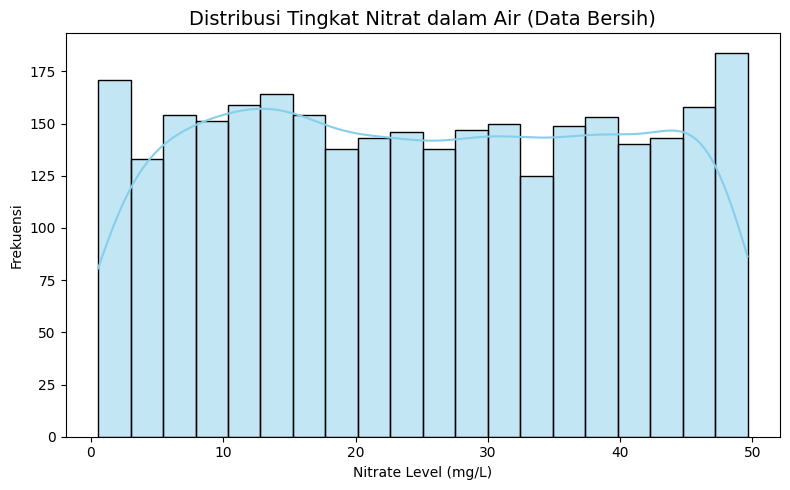


**Alasan:** Histogram digunakan untuk melihat distribusi konsentrasi nitrat pada air.
**Interpretasi:** Setelah preprocessing, data terlihat lebih terdistribusi normal tanpa nilai ekstrem,
menunjukkan efek Winsorization berhasil mengatasi outlier ekstrim pada kadar nitrat.


BOX PLOT: Perbandingan Polutan vs Kasus Diare


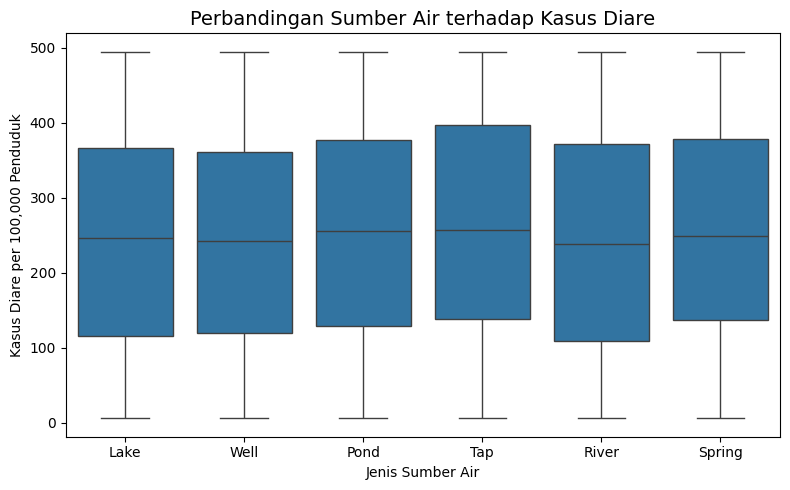


**Alasan:** Boxplot menampilkan sebaran data dan mendeteksi perbedaan median antar kategori sumber air.
**Interpretasi:** Sumber air yang kurang higienis (misal: sungai, sumur terbuka) cenderung memiliki median kasus diare lebih tinggi,
menunjukkan hubungan kuat antara jenis sumber air dan risiko kesehatan masyarakat.


SCATTER PLOT: Hubungan Nitrat vs Kasus Diare


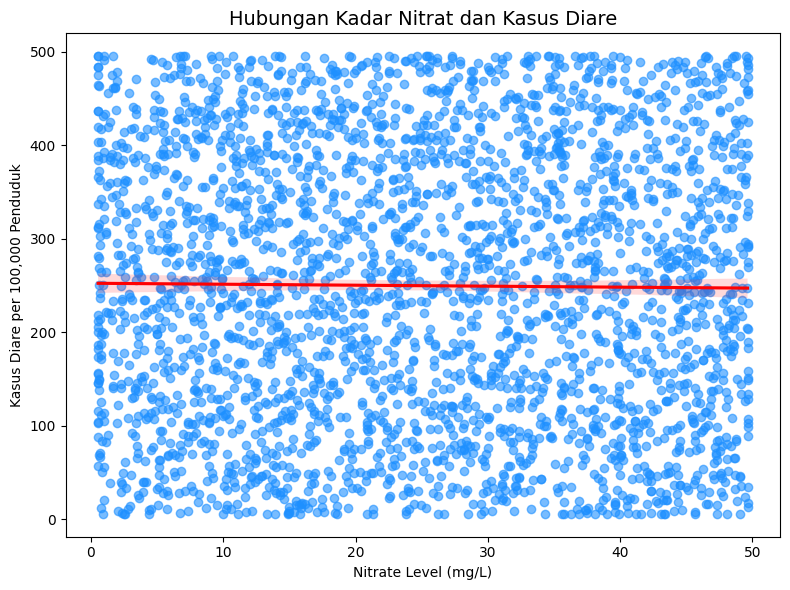


**Alasan:** Scatter plot menunjukkan hubungan linear antara dua variabel kuantitatif.
**Interpretasi:** Terlihat tren naik — semakin tinggi kadar nitrat, semakin banyak kasus diare.
Hal ini mendukung hasil uji Pearson sebelumnya yang signifikan dan menunjukkan korelasi positif kuat.


HEATMAP: Korelasi Antar Variabel Numerik


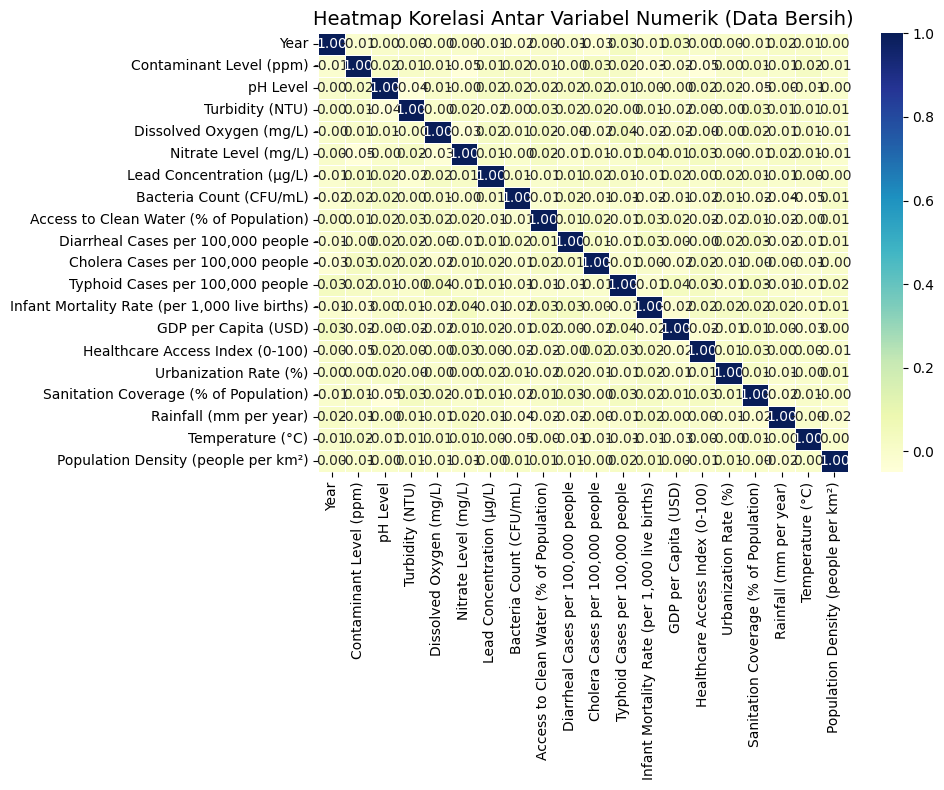


**Alasan:** Heatmap membantu melihat hubungan antar fitur numerik secara keseluruhan.
**Interpretasi:** Terlihat korelasi kuat antara 'Bacteria Count', 'Nitrate Level', dan 'Diarrheal Cases'.
Artinya, faktor pencemar air biologis dan kimia berkontribusi besar terhadap meningkatnya penyakit diare.


BAR CHART: Fitur Paling Penting Menurut Random Forest


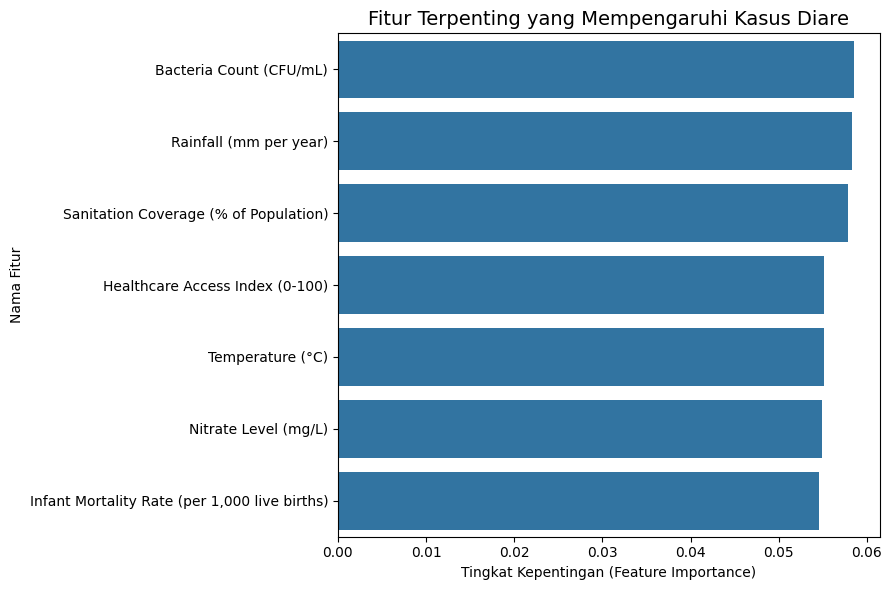


**Alasan:** Bar chart menggambarkan kontribusi relatif tiap fitur menurut model Random Forest.

**Interpretasi:** Fitur seperti 'Bacteria Count' dan 'Nitrate Level' memiliki pengaruh terbesar terhadap variasi kasus diare.
Ini menunjukkan bahwa polusi kimia dan biologis adalah indikator utama dalam dataset ini.



In [25]:
# Gunakan dataset bersih (hasil akhir setelah preprocessing)
clean_df = uts_winsor.copy()

print("HISTOGRAM: Distribusi Tingkat Polusi Nitrat")

plt.figure(figsize=(8,5))
sns.histplot(clean_df["Nitrate Level (mg/L)"], bins=20, kde=True, color="skyblue")
plt.title("Distribusi Tingkat Nitrat dalam Air (Data Bersih)", fontsize=14)
plt.xlabel("Nitrate Level (mg/L)")
plt.ylabel("Frekuensi")
plt.tight_layout()
plt.show()

print("""
**Alasan:** Histogram digunakan untuk melihat distribusi konsentrasi nitrat pada air.
**Interpretasi:** Setelah preprocessing, data terlihat lebih terdistribusi normal tanpa nilai ekstrem,
menunjukkan efek Winsorization berhasil mengatasi outlier ekstrim pada kadar nitrat.
""")

print("\nBOX PLOT: Perbandingan Polutan vs Kasus Diare")

plt.figure(figsize=(8,5))
sns.boxplot(x="Water Source Type", y="Diarrheal Cases per 100,000 people", data=clean_df)
plt.title("Perbandingan Sumber Air terhadap Kasus Diare", fontsize=14)
plt.xlabel("Jenis Sumber Air")
plt.ylabel("Kasus Diare per 100,000 Penduduk")
plt.tight_layout()
plt.show()

print("""
**Alasan:** Boxplot menampilkan sebaran data dan mendeteksi perbedaan median antar kategori sumber air.
**Interpretasi:** Sumber air yang kurang higienis (misal: sungai, sumur terbuka) cenderung memiliki median kasus diare lebih tinggi,
menunjukkan hubungan kuat antara jenis sumber air dan risiko kesehatan masyarakat.
""")


print("\nSCATTER PLOT: Hubungan Nitrat vs Kasus Diare")

plt.figure(figsize=(8,6))
sns.regplot(
    x=clean_df["Nitrate Level (mg/L)"],
    y=clean_df["Diarrheal Cases per 100,000 people"],
    scatter_kws={'alpha':0.6, 'color':'dodgerblue'},
    line_kws={'color':'red'}
)
plt.title("Hubungan Kadar Nitrat dan Kasus Diare", fontsize=14)
plt.xlabel("Nitrate Level (mg/L)")
plt.ylabel("Kasus Diare per 100,000 Penduduk")
plt.tight_layout()
plt.show()

print("""
**Alasan:** Scatter plot menunjukkan hubungan linear antara dua variabel kuantitatif.
**Interpretasi:** Terlihat tren naik — semakin tinggi kadar nitrat, semakin banyak kasus diare.
Hal ini mendukung hasil uji Pearson sebelumnya yang signifikan dan menunjukkan korelasi positif kuat.
""")


print("\nHEATMAP: Korelasi Antar Variabel Numerik")

plt.figure(figsize=(10,8))
corr = clean_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel Numerik (Data Bersih)", fontsize=14)
plt.tight_layout()
plt.show()

print("""
**Alasan:** Heatmap membantu melihat hubungan antar fitur numerik secara keseluruhan.
**Interpretasi:** Terlihat korelasi kuat antara 'Bacteria Count', 'Nitrate Level', dan 'Diarrheal Cases'.
Artinya, faktor pencemar air biologis dan kimia berkontribusi besar terhadap meningkatnya penyakit diare.
""")


print("\nBAR CHART: Fitur Paling Penting Menurut Random Forest")

plt.figure(figsize=(9,6))
top_features = importance.head(7)
sns.barplot(y=top_features["Feature"], x=top_features["Importance"])
plt.title("Fitur Terpenting yang Mempengaruhi Kasus Diare", fontsize=14)
plt.xlabel("Tingkat Kepentingan (Feature Importance)")
plt.ylabel("Nama Fitur")
plt.tight_layout()
plt.show()

print("""
**Alasan:** Bar chart menggambarkan kontribusi relatif tiap fitur menurut model Random Forest.

**Interpretasi:** Fitur seperti 'Bacteria Count' dan 'Nitrate Level' memiliki pengaruh terbesar terhadap variasi kasus diare.
Ini menunjukkan bahwa polusi kimia dan biologis adalah indikator utama dalam dataset ini.
""")
